___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

#### Load Dataset

In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [ ]:
#Check for missing values
df.isnull().sum().any()

False

In [ ]:
#Check for duplicates
df.duplicated().sum().any()

False

In [ ]:
df['CustomerID'].nunique()

200

In [ ]:
#drop unnecessary column
df.drop(["CustomerID"], axis = 1, inplace=True)

###Gender column Analysis:

In [ ]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [ ]:
# Define the mapping dictionary
mapping = {'Male': 0, 'Female': 1}

# Map the categorical column to 0s and 1s
df['Gender'] = df['Gender'].map(mapping)

# Print the mapped column
print(df['Gender'])

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: int64


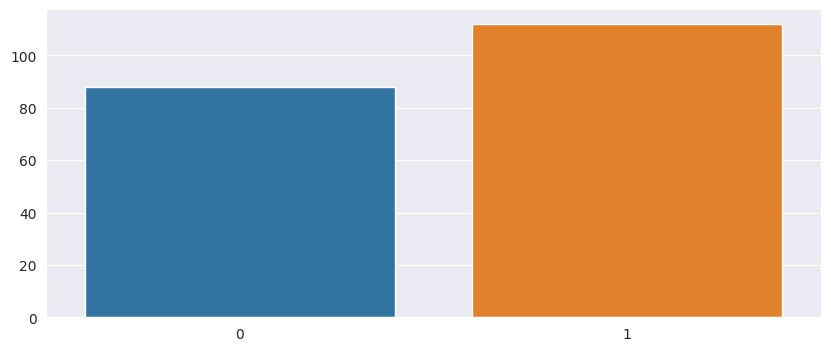

In [ ]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

More female customers than male.

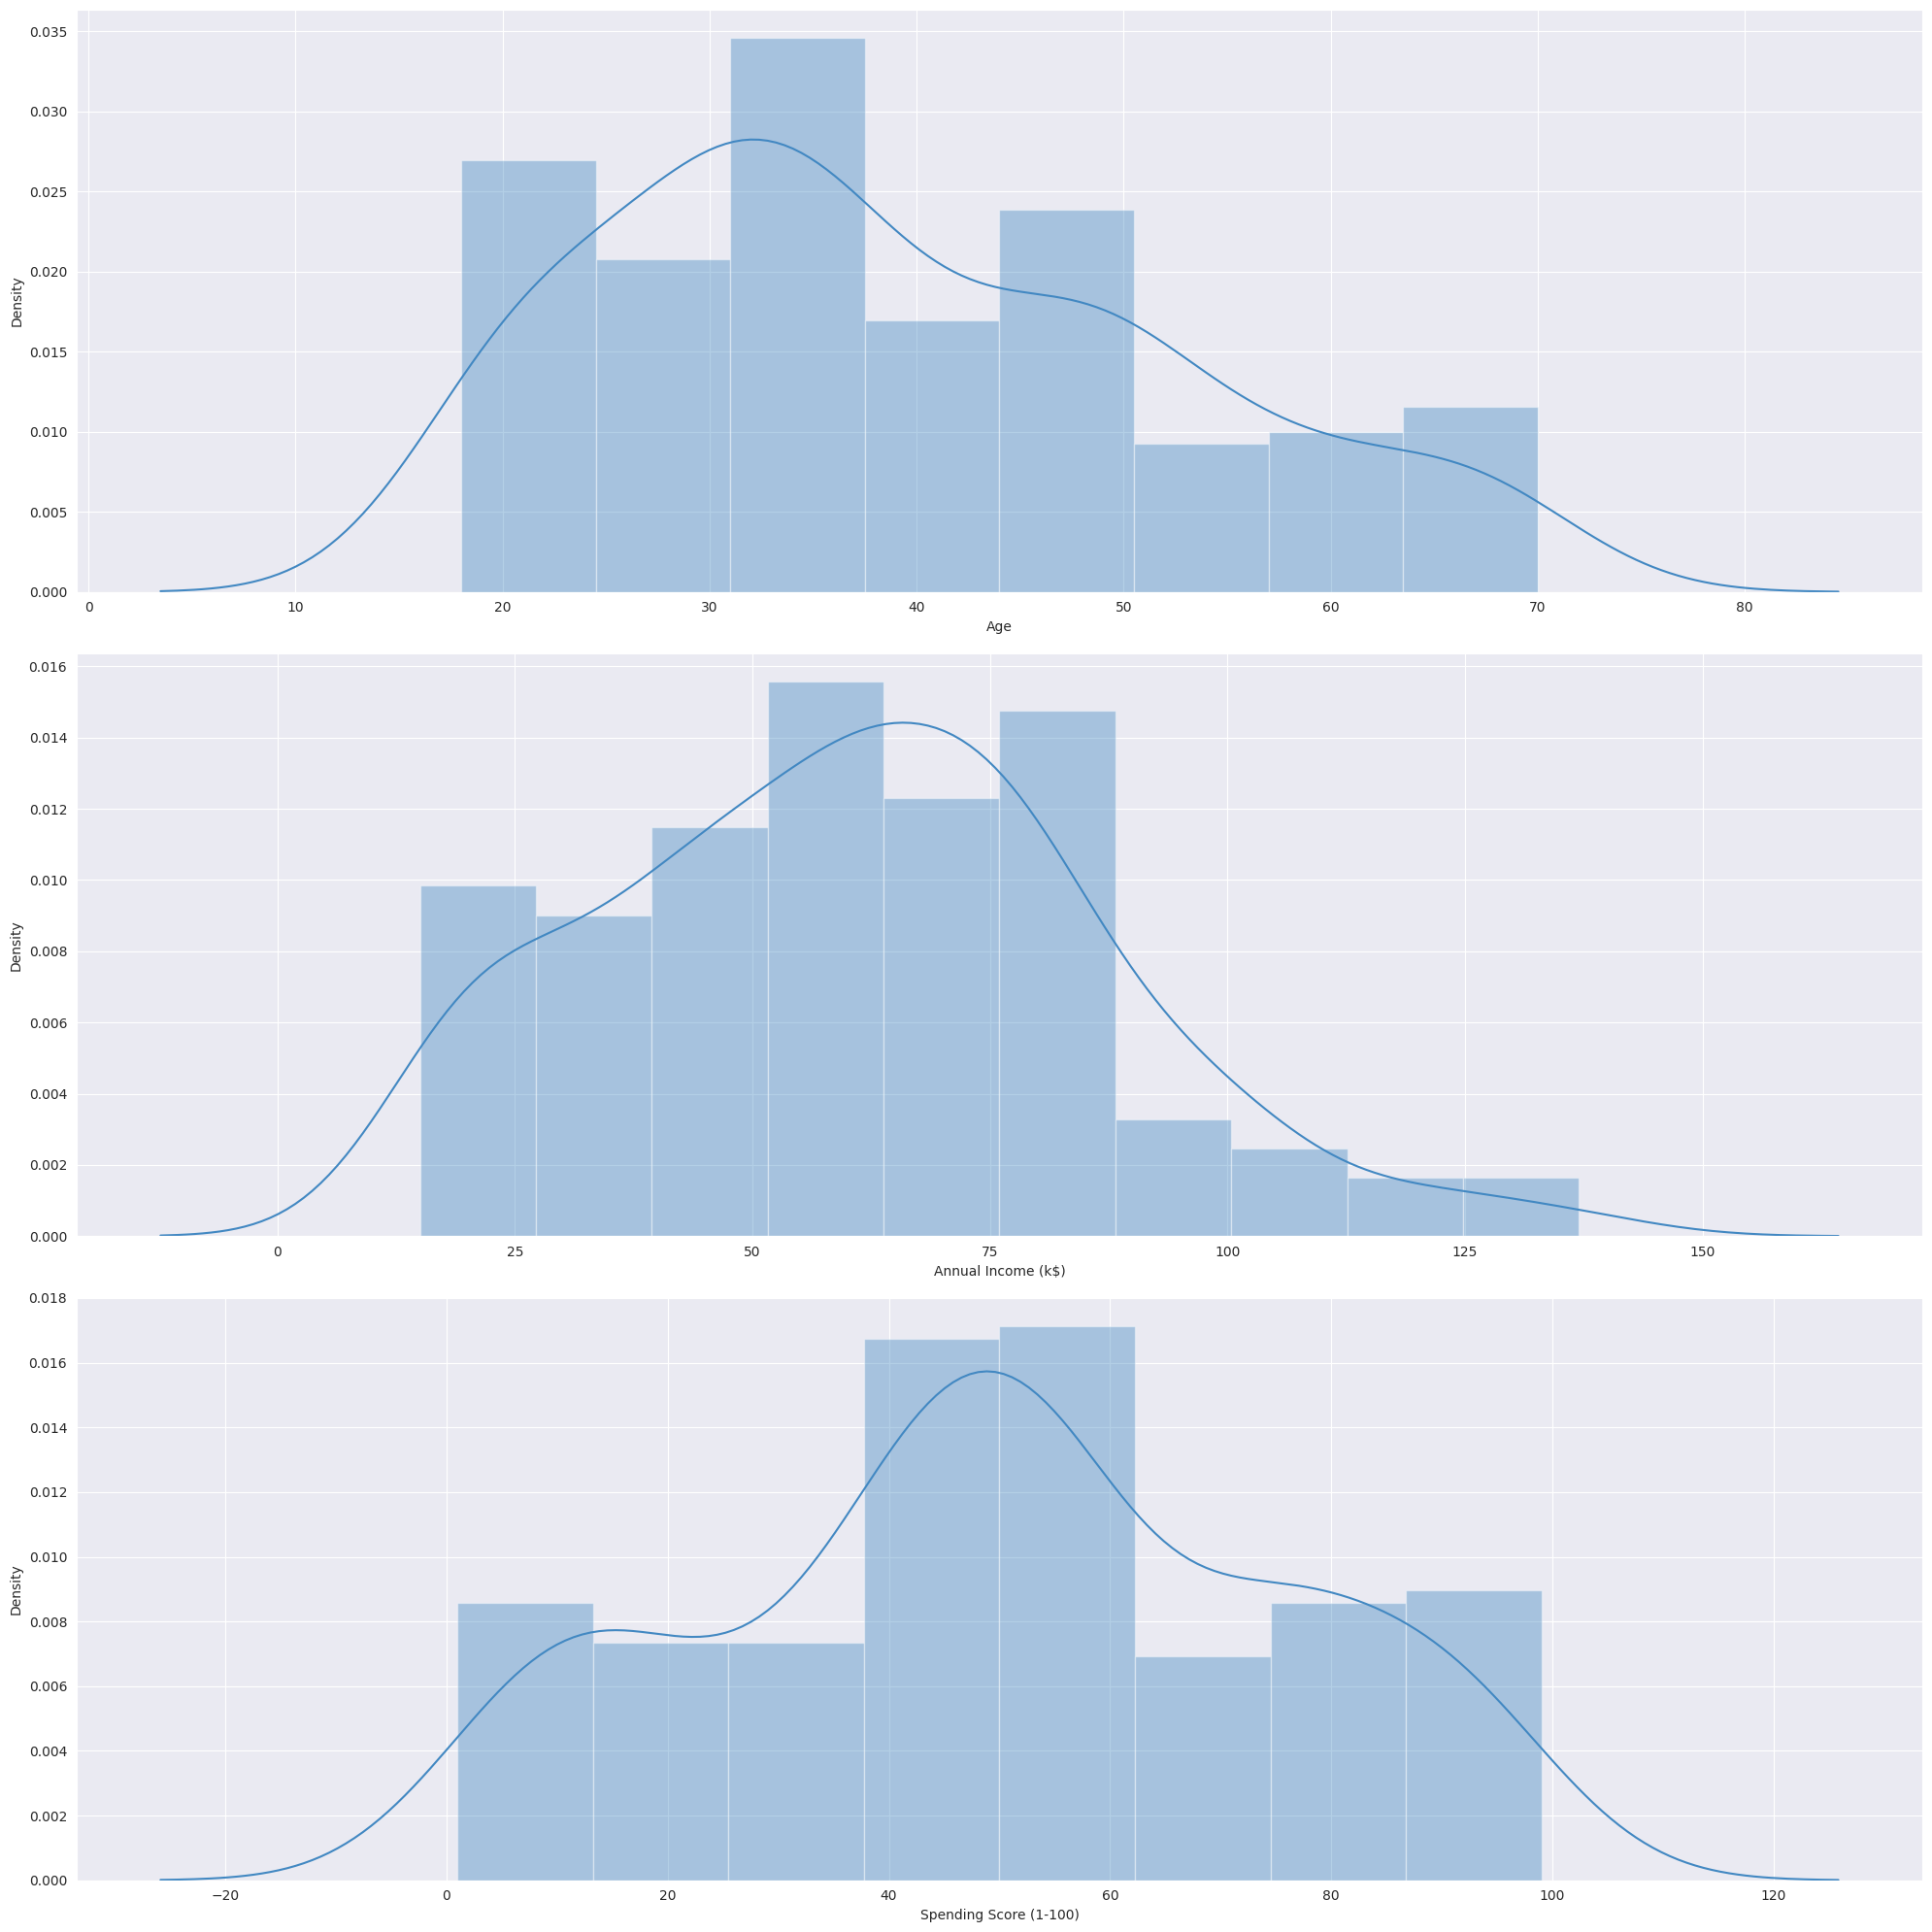

In [ ]:
plt.figure(figsize = (20, 20))
column=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in range(0,3):
    plt.subplot(3, 1, i+1)
    sns.distplot(df[column[i]], color="#4288c2")    #histplot,distplot
    plt.tight_layout()

Insights:

*   Most of the annual income falls between 50K to 85K.
*   There are customers of a wide variety of ages.
*   The maximum spending score is in the range of 40 to 60.





##Distribution of 'Age', 'Annual Income (k$)',and 'Spending Score (1-100)' columns

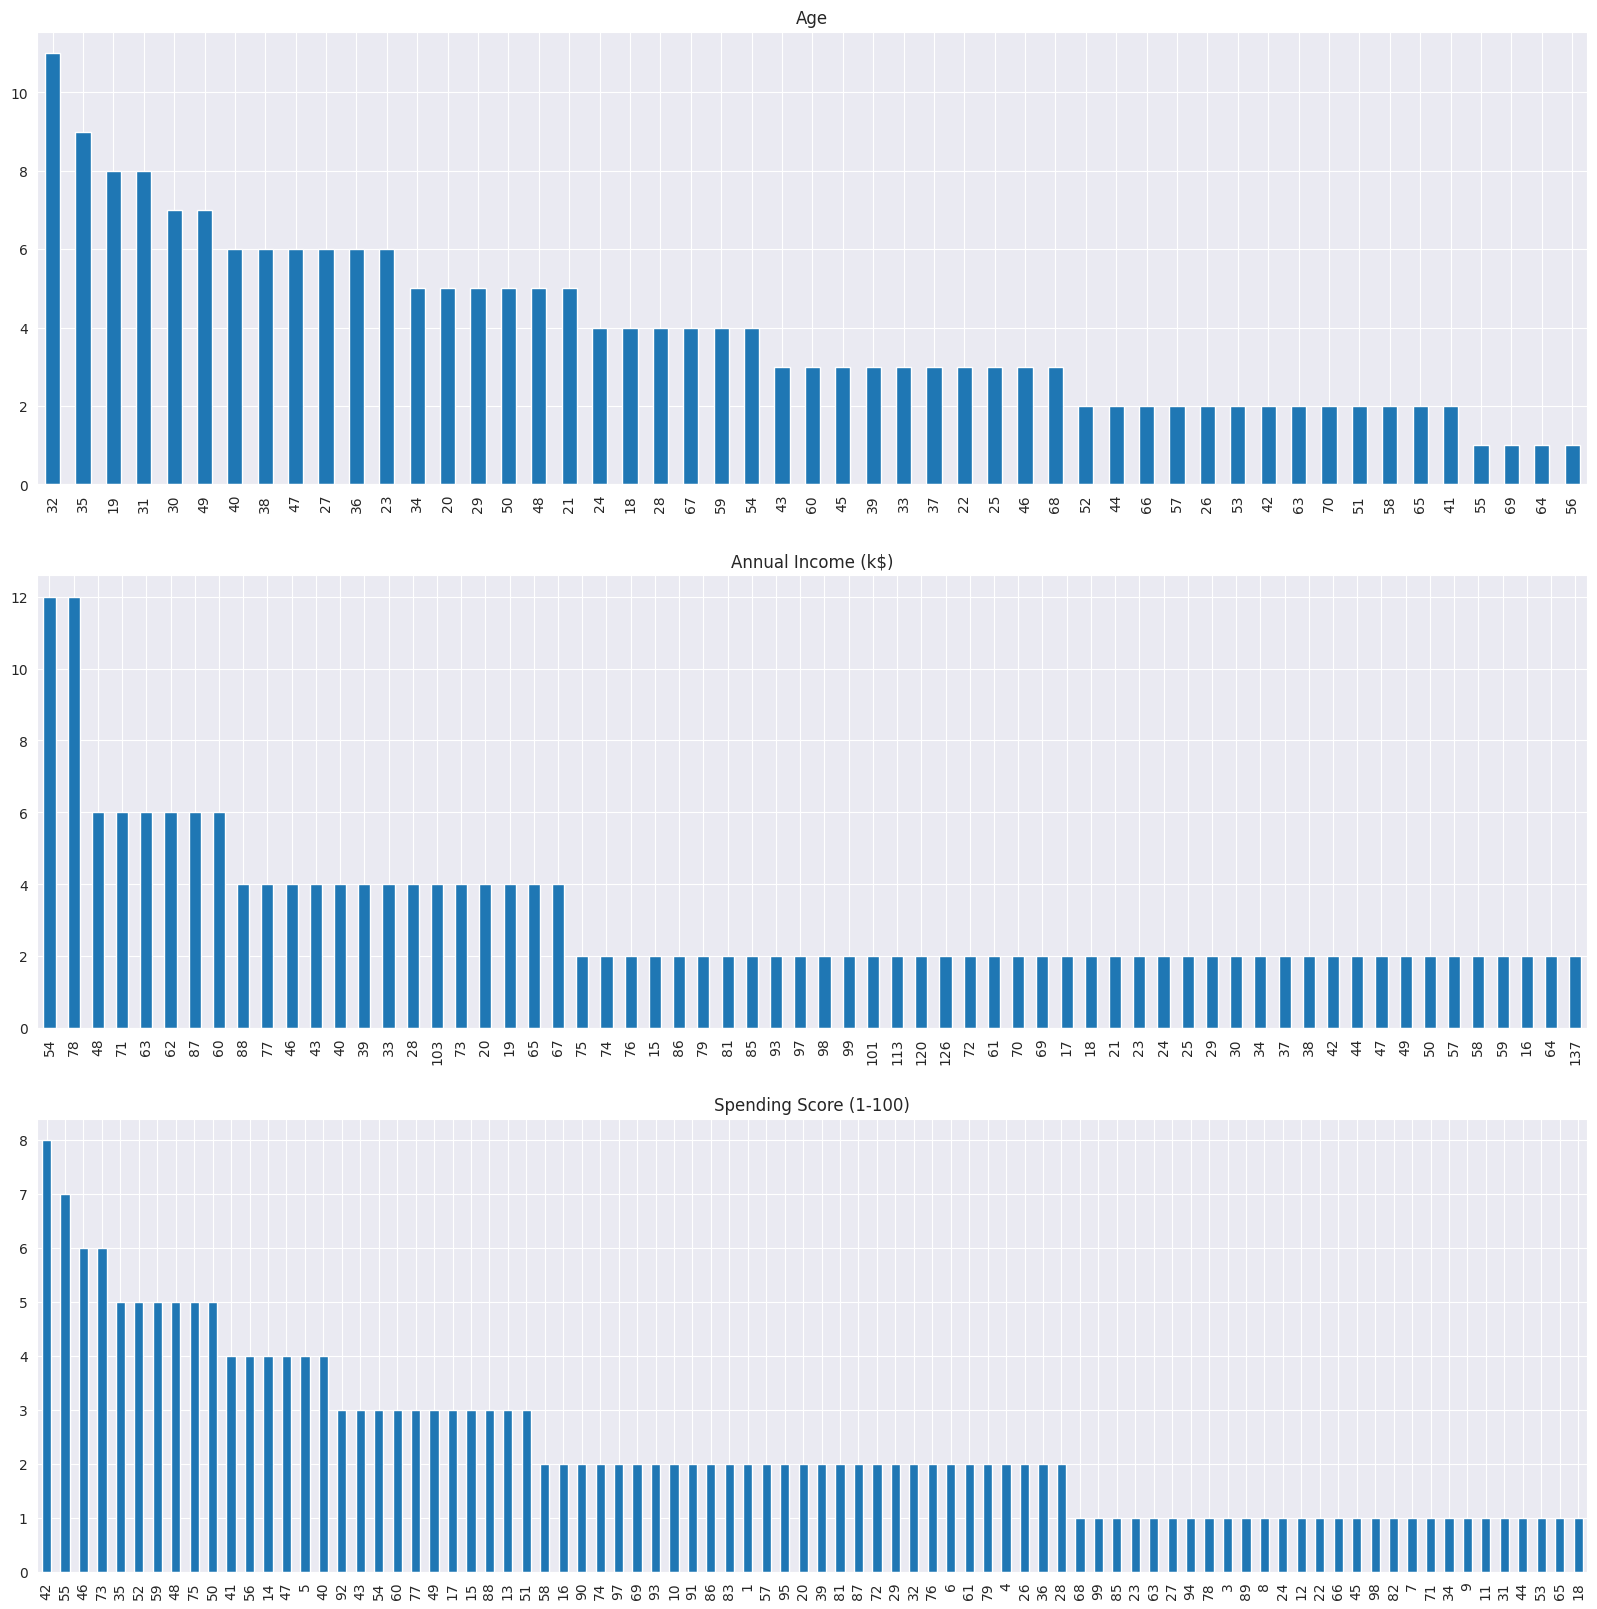

In [ ]:
column=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in range(0,3):
      plt.subplot(3, 1, i+1)
      plt.title(column[i])
      df[column[i]].value_counts().plot.bar(figsize = (20, 20))

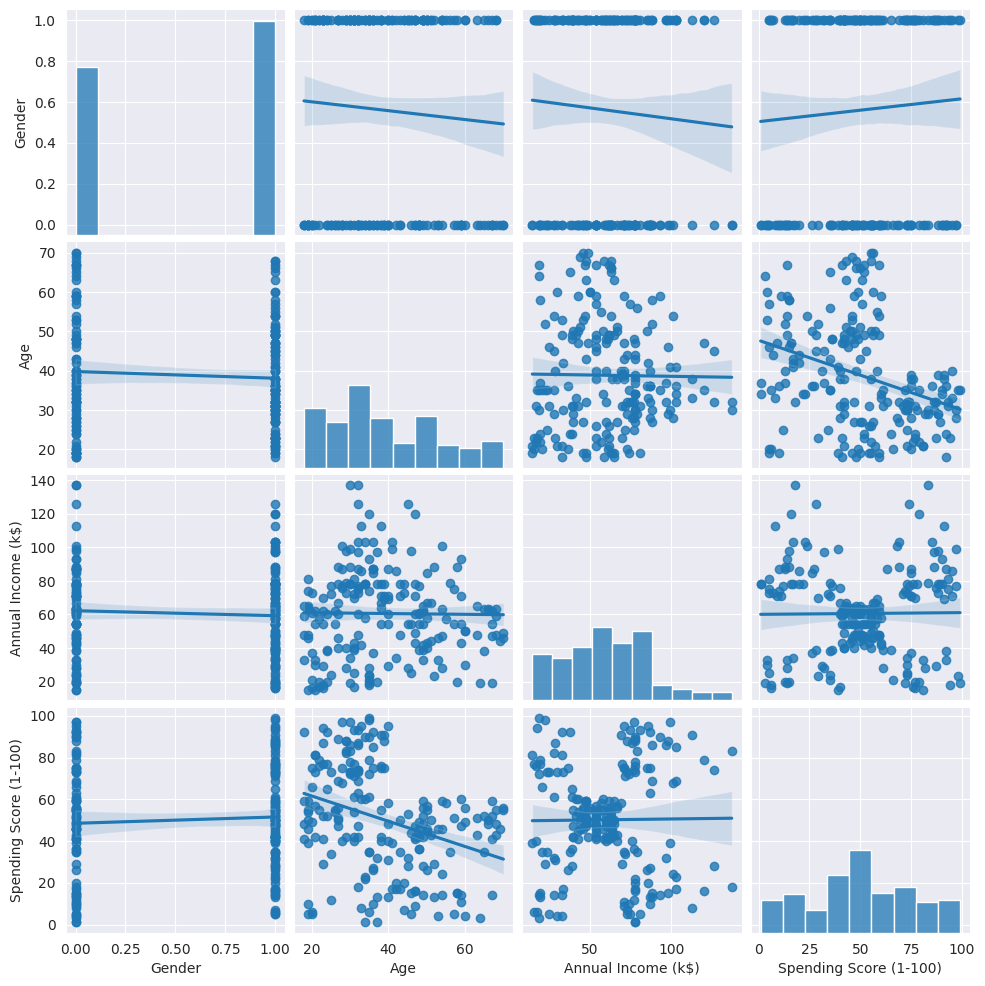

In [ ]:
sns.pairplot(df, kind="reg")

##Checking the Outliers in the dataset

<Axes: >

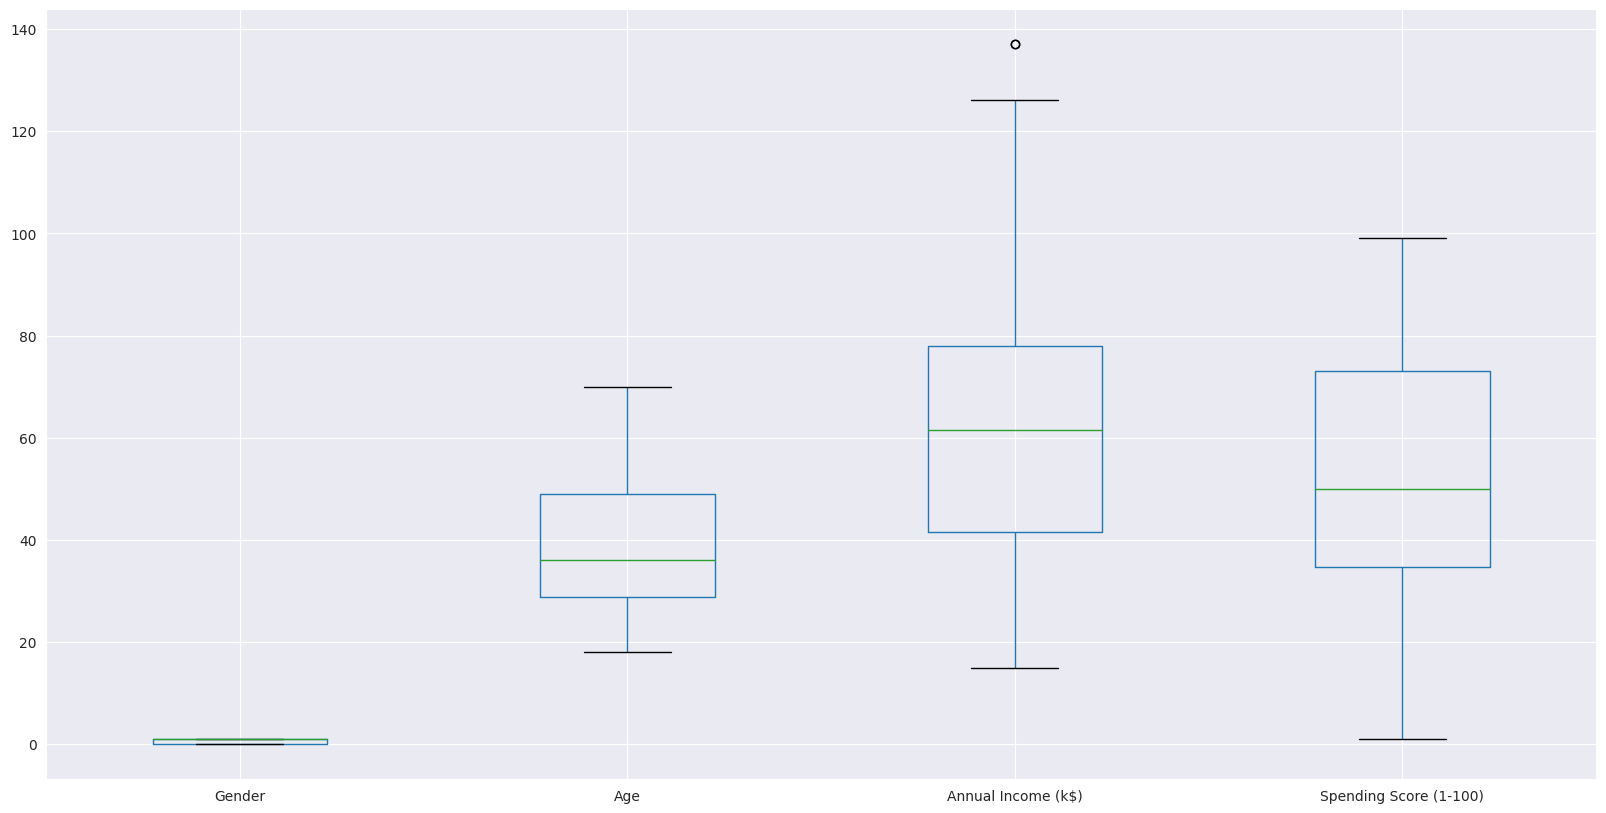

In [ ]:
plt.figure(figsize =(20,10))
df.boxplot()

##Correlation

<Axes: >

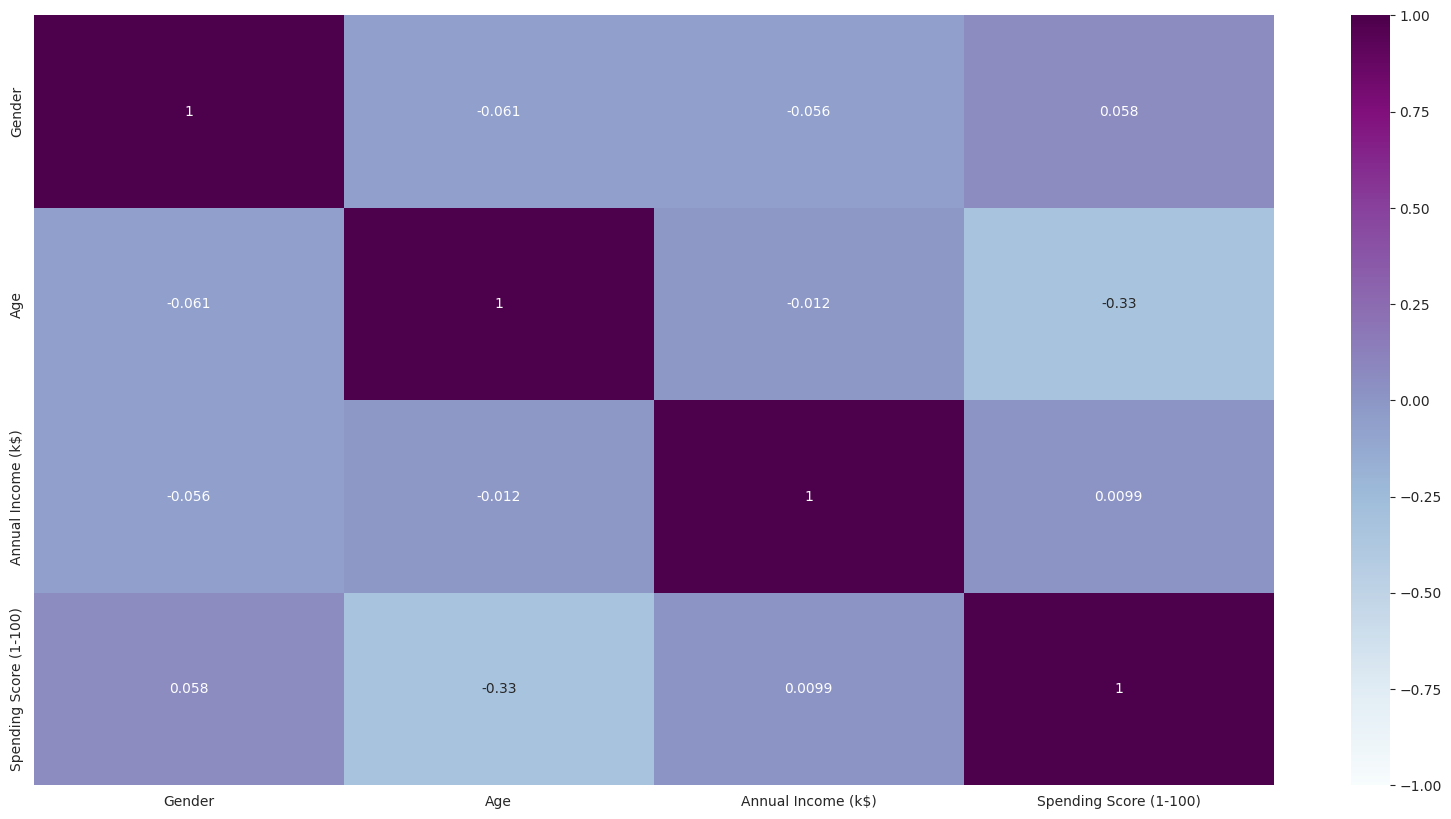

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, cmap="BuPu")

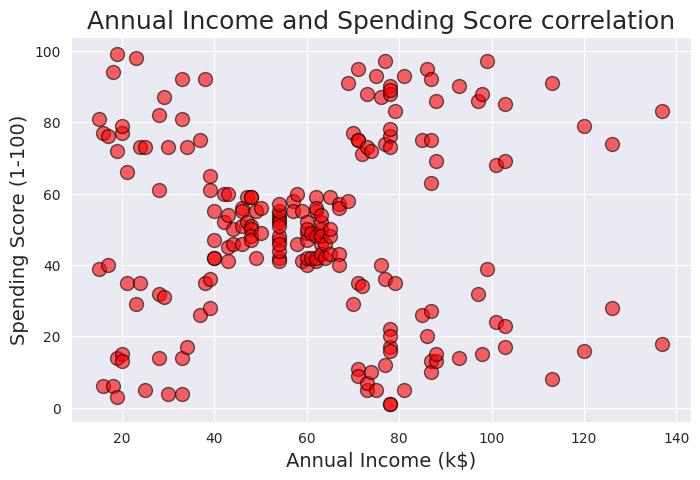

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Annual Income and Spending Score correlation",fontsize=18)
plt.xlabel ("Annual Income (k$)",fontsize=14)
plt.ylabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color='red',edgecolor='k',alpha=0.6, s=100)
plt.show()

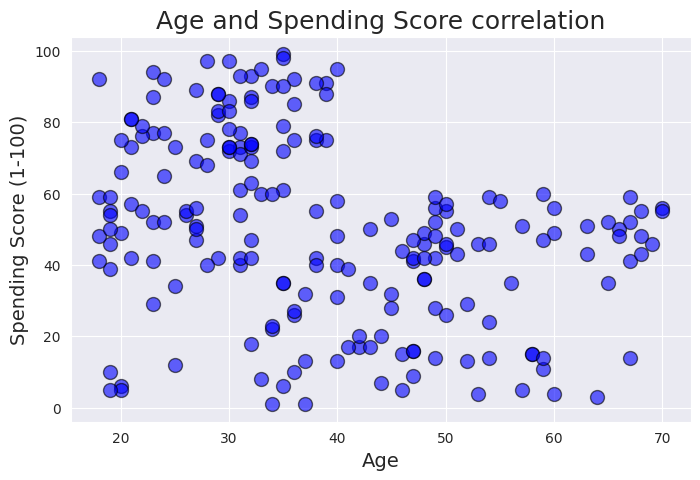

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Age and Spending Score correlation",fontsize=18)
plt.xlabel ("Age",fontsize=14)
plt.ylabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Age'],df['Spending Score (1-100)'],color='blue',edgecolor='k',alpha=0.6, s=100)
plt.show()

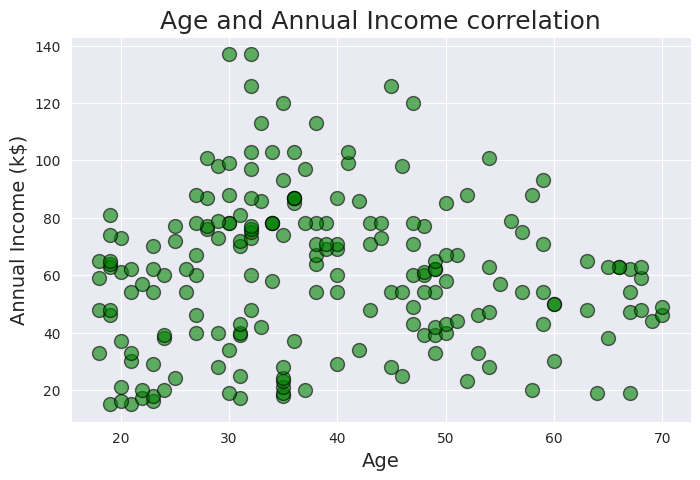

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Age and Annual Income correlation",fontsize=18)
plt.xlabel ("Age",fontsize=14)
plt.ylabel ("Annual Income (k$)",fontsize=14)
plt.grid(True)
plt.scatter(df['Age'],df['Annual Income (k$)'],color='green',edgecolor='k',alpha=0.6, s=100)
plt.show()

## Conclusion of EDA …
- It seems there are no high correlations between the variables
- Scaling seems unnecessary
- Balanced data
- Based on the data: customers can be segmented into 2-5 clusters

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### K_Means Clustering

In [ ]:
df1 = df.drop(columns="Gender")

In [ ]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd


def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.

    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.

    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)

    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """

    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)

    # Sample n observations from D : P

    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')

    data_frame_sample = data_frame.sample(n=sampling_size)

    # Get the distance to their neirest neighbors in D : X

    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]

    # Randomly simulate n points with the same variation as in D : Q.

    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()

    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)

    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)

    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)

    # Get the distance to their neirest neighbors in D : Y

    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist

    # return the hopkins score

    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)

    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')

    return x / (x + y)[0]

In [ ]:
hopkins(df1, df1.shape[0])

0.3185124556924289

In [ ]:
X1=df[['Age','Spending Score (1-100)']]
X1.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [ ]:
hopkins(X1, X1.shape[0])

0.29008745612285214

#### *ii. Determine optimal number of clusters*

Elbow metod

In [ ]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(X1)
    ssd.append(model.inertia_)


Text(0.5, 1.0, 'elbow method')

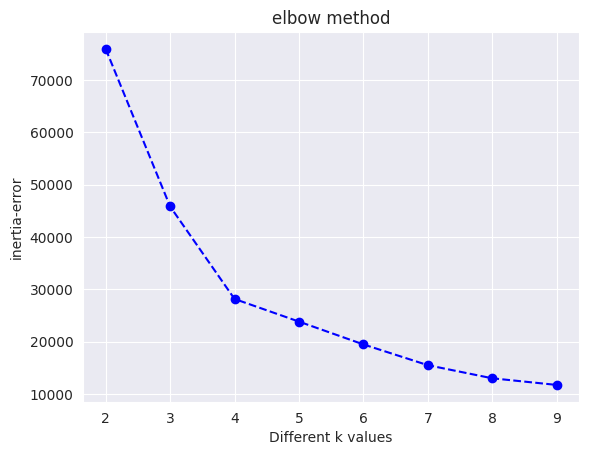

In [ ]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [ ]:
-pd.Series(ssd).diff()

0             NaN
1    30108.479394
2    17675.093049
3     4327.334745
4     4355.130911
5     3968.924776
6     2507.709506
7     1268.463332
dtype: float64

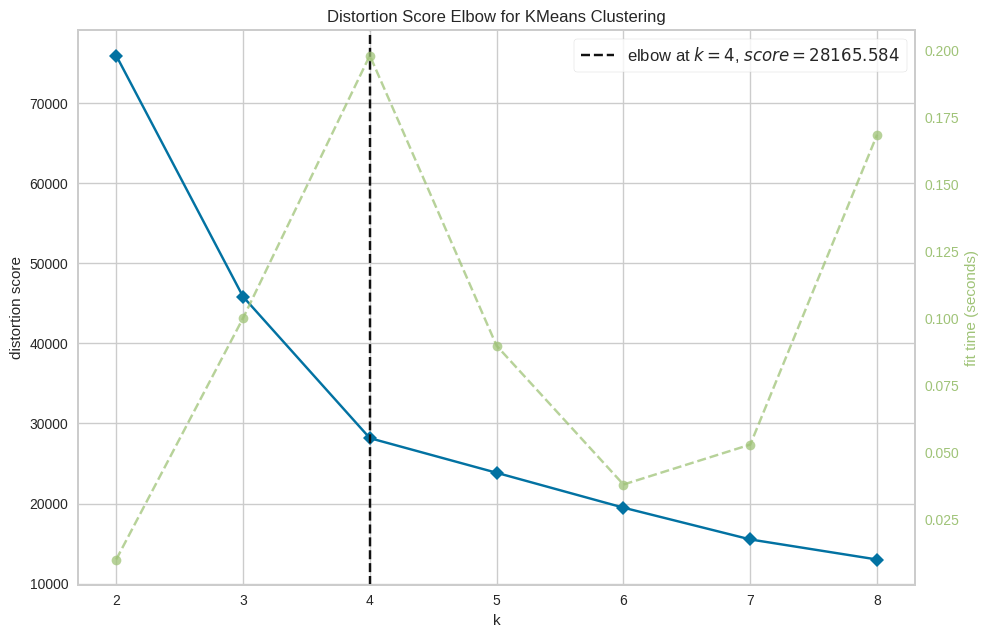

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2, 9), size=(1080, 720))

visualizer.fit(X1)
visualizer.poof();

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116
For n_clusters=10, the silhouette score is 0.4141899863508767


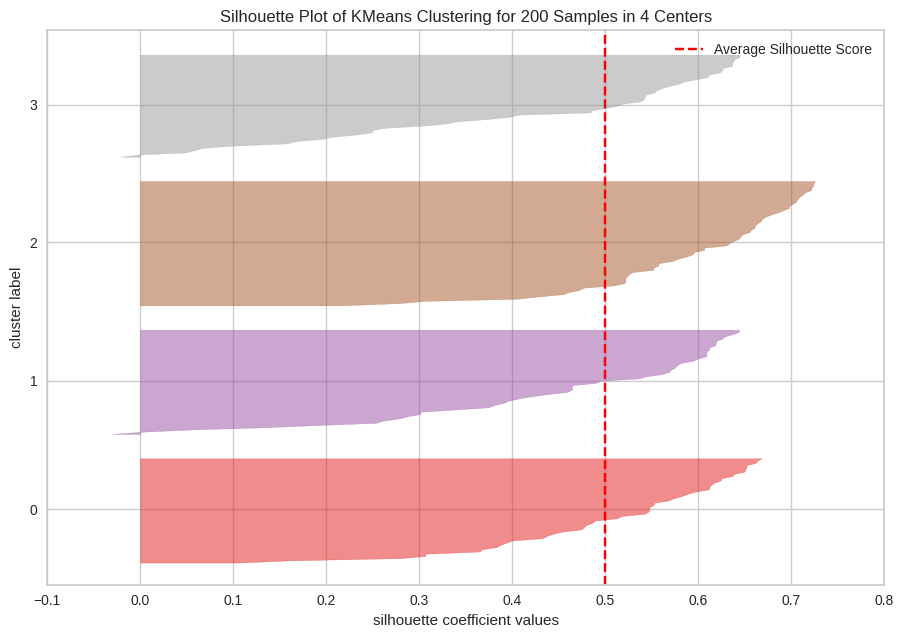

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

model_ssd = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model_ssd, size=(1080, 720))

visualizer.fit(X1)    # Fit the data to the visualizer
visualizer.poof()

In [ ]:
for i in range(model_ssd.n_clusters):
    label = (model_ssd.labels_ == i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5091299145013191
mean silhouette score for label 1    : 0.45429047261675404
mean silhouette score for label 2    : 0.5960779476836082
mean silhouette score for label 3    : 0.4197289676734112
mean silhouette score for all labels : 0.49973941540141753


#### *iii. Apply K Means*

In [ ]:
modelk = KMeans(n_clusters=4, random_state=42)

#### *iv. Visualizing and Labeling All the Clusters*

In [ ]:
y_kmeans = modelk.fit_predict(X1)

In [ ]:
X1.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [ ]:
df['clusterx1_k'] = y_kmeans
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusterx1_k
0,0,19,15,39,3
1,0,21,15,81,2
2,1,20,16,6,1
3,1,23,16,77,2
4,1,31,17,40,3


In [ ]:
df.groupby('Gender')['clusterx1_k'].value_counts()

Gender  clusterx1_k
0       1              24
        2              24
        0              22
        3              18
1       2              33
        3              29
        0              26
        1              24
Name: clusterx1_k, dtype: int64

In [ ]:
df.groupby(['Gender', 'clusterx1_k'])['Age'].mean()

Gender  clusterx1_k
0       0              57.545455
        1              43.000000
        2              30.708333
        3              26.000000
1       0              54.153846
        1              43.583333
        2              29.787879
        3              28.620690
Name: Age, dtype: float64

In [ ]:
centers = modelk.cluster_centers_

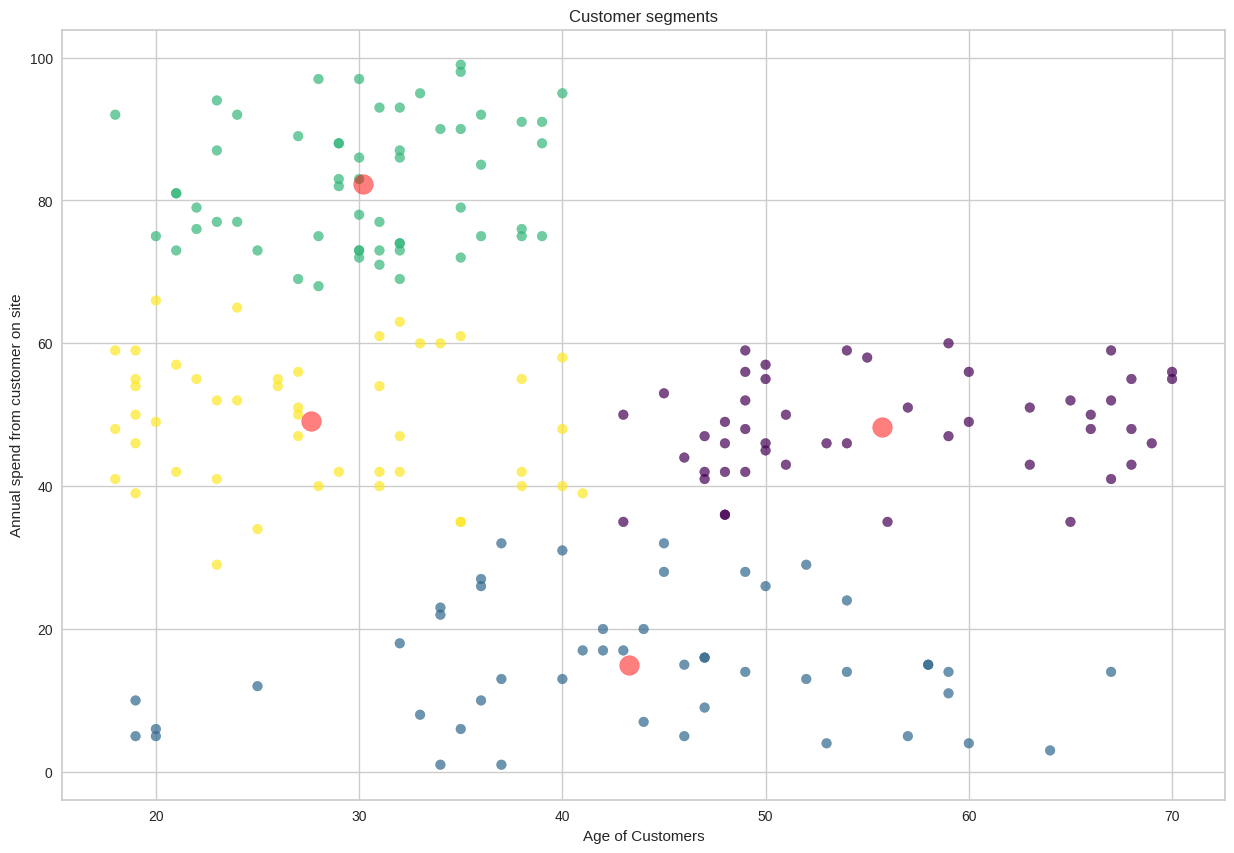

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(df["Age"], df["Spending Score (1-100)"],
            c=df.clusterx1_k, cmap="viridis", alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Customer segments')
plt.xlabel('Age of Customers')
plt.ylabel('Annual spend from customer on site');

### Clustering based on Annual Income and Spending Score

In [ ]:
X2=df.iloc[:, [2,3]]
X2.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
hopkins(X2, X2.shape[0])

0.29915024947870383

*ii.Determine optimal number of clusters*

In [ ]:
ssd = []

K = range(2,11)

for k in K:
    kmeans = KMeans(n_clusters =k, random_state=42)
    kmeans.fit(X2)
    ssd.append(kmeans.inertia_)

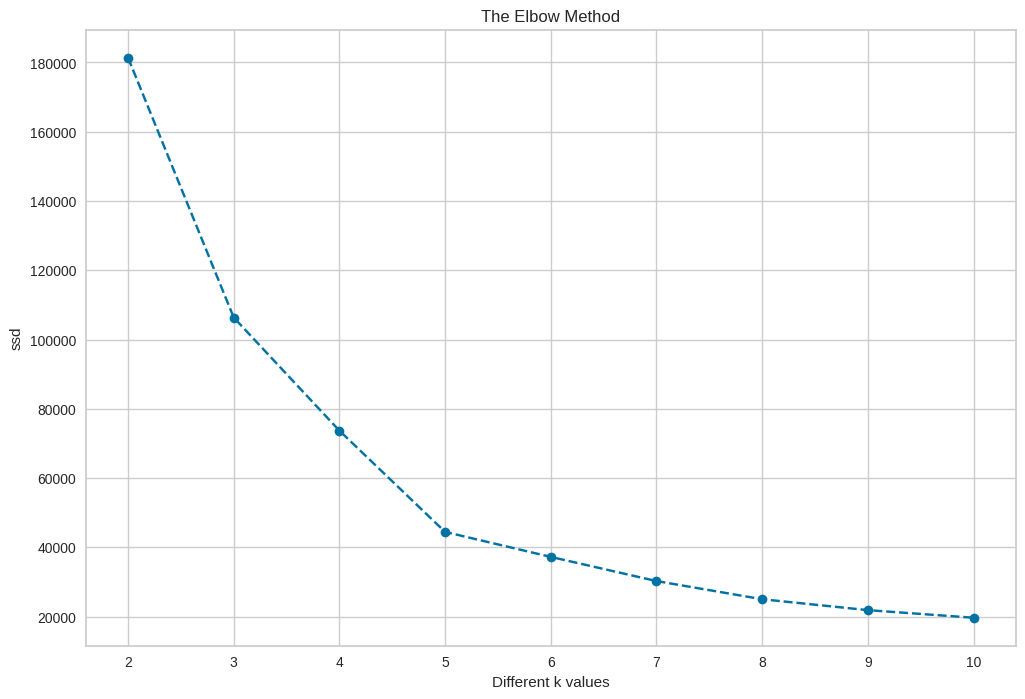

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("ssd")
plt.title("The Elbow Method");

In [ ]:
ssd

[181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30259.65720728547,
 25011.839349156588,
 21862.092672182895,
 19672.072849014323]

In [ ]:
-pd.Series(ssd).diff()

0             NaN
1    75015.222897
2    32668.584023
3    29231.333592
4     7214.640937
5     6974.157303
6     5247.817858
7     3149.746677
8     2190.019823
dtype: float64

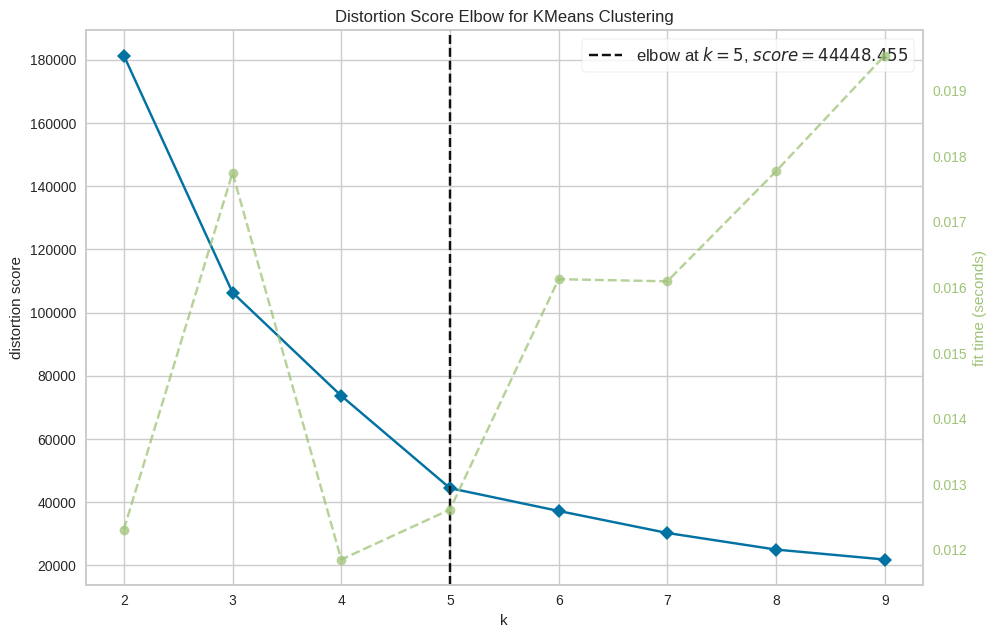

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2, 10), size=(1080, 720))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show();

In [ ]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113
For n_clusters=9, the silhouette score is 0.4553729779390266


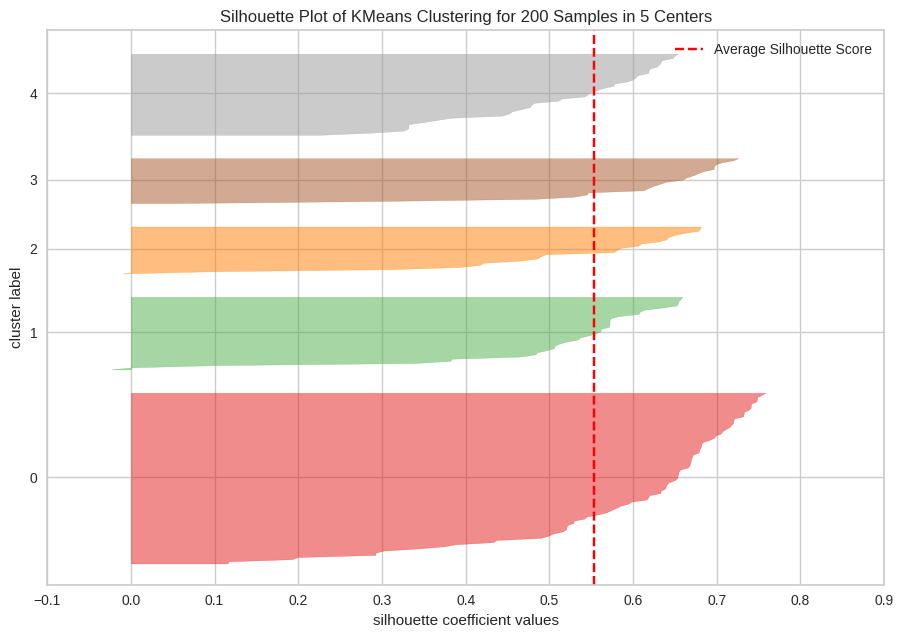

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
model4 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model4, size=(1080, 720))

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof()

#### *ii. Determine optimal number of clusters*

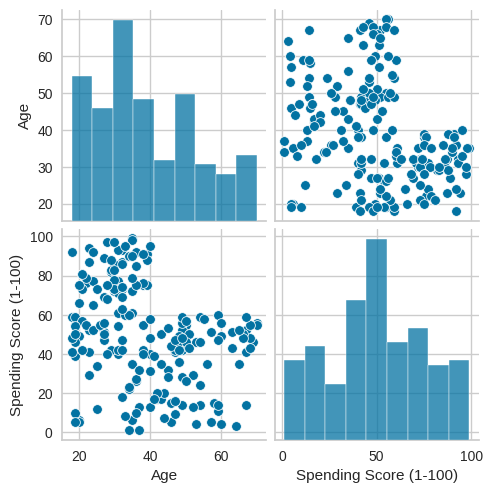

In [ ]:
#We look at the distributions of age and spending score.
sns.pairplot(X1);

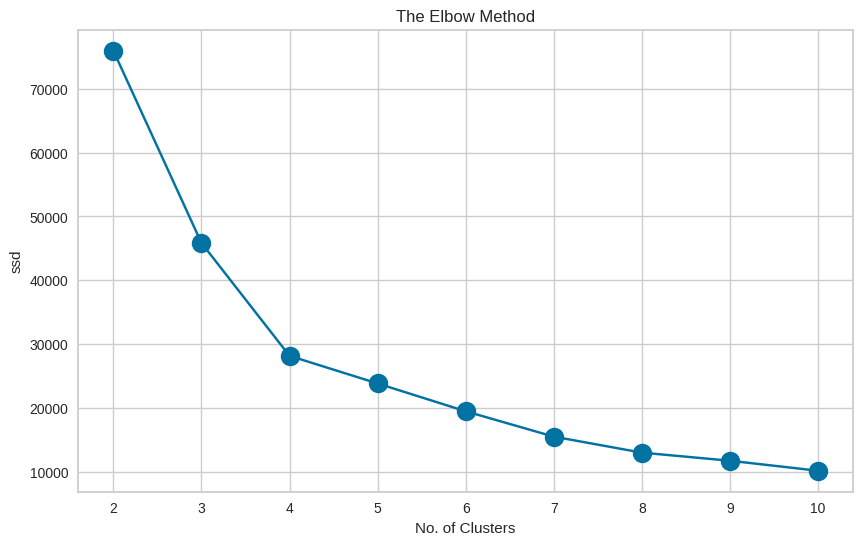

In [ ]:
ssd = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X1)
    ssd.append(kmeans.inertia_)  # distances from each observation to each cluster centroid

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), ssd, "bo-",  markersize=14.0)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()

Text(0.5, 1.0, 'elbow method')

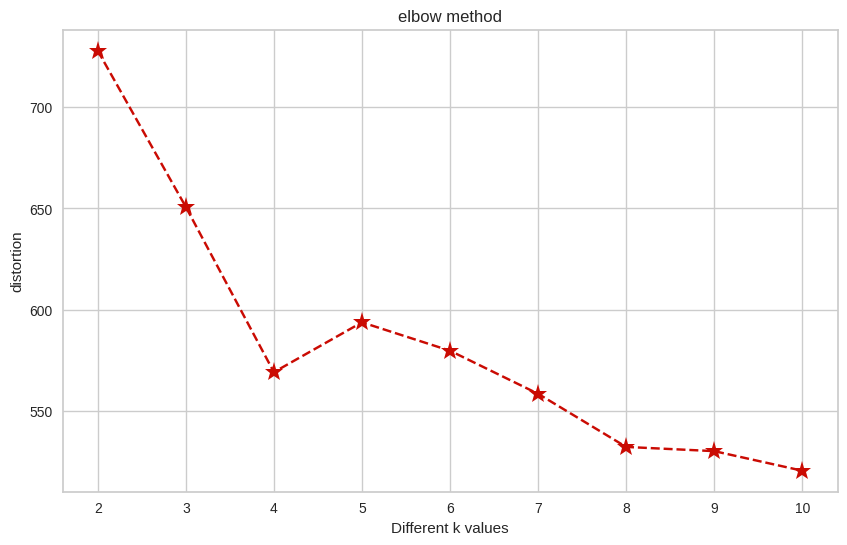

In [ ]:
#distortion
K = range(2, 11)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X1)
    distances = kmeanModel.transform(X1) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

plt.figure(figsize=(10,6))
plt.plot(K, distortion, "r*--", markersize=14.0)
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

In [ ]:
#silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116
For n_clusters=10, the silhouette score is 0.4141899863508767


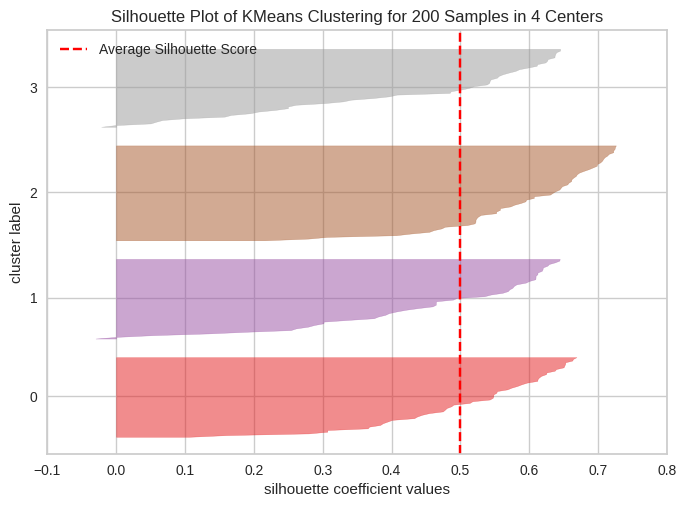

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# silhoutte score of each cluster
model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X1)  # Fit the data to the visualizer
visualizer.poof()

In [ ]:
model3.n_clusters

4

#### *iii. Apply K Means*

In [ ]:
model = KMeans(n_clusters=5, random_state=42)
model.fit_predict(X2)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [ ]:
y_kmeans = model.fit_predict(X2)

In [ ]:
df['clusterx2_k'] = y_kmeans
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusterx1_k,clusterx2_k
0,0,19,15,39,3,2
1,0,21,15,81,2,3
2,1,20,16,6,1,2
3,1,23,16,77,2,3
4,1,31,17,40,3,2


In [ ]:
df_x1= X1.copy()
df_x1.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [ ]:
df_x2= X2.copy()
df_x2.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#### *iv. Visualizing and Labeling All the Clusters*

In [ ]:
centers = model.cluster_centers_

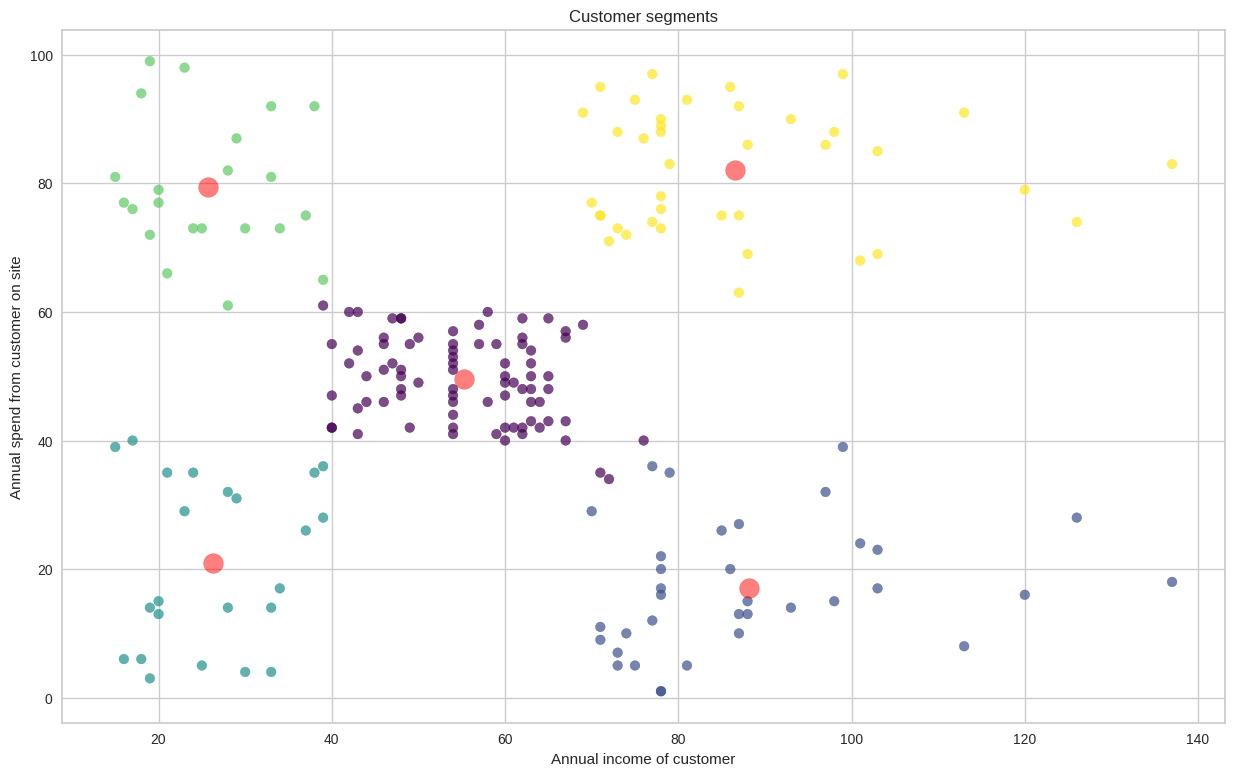

In [ ]:
plt.figure(figsize=(15, 9))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c = df.clusterx2_k, cmap = "viridis", alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site');

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import dendrogram
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.cluster import AgglomerativeClustering

interactive(children=(Dropdown(description='method', options=('ward', 'complete', 'average', 'single'), value=…

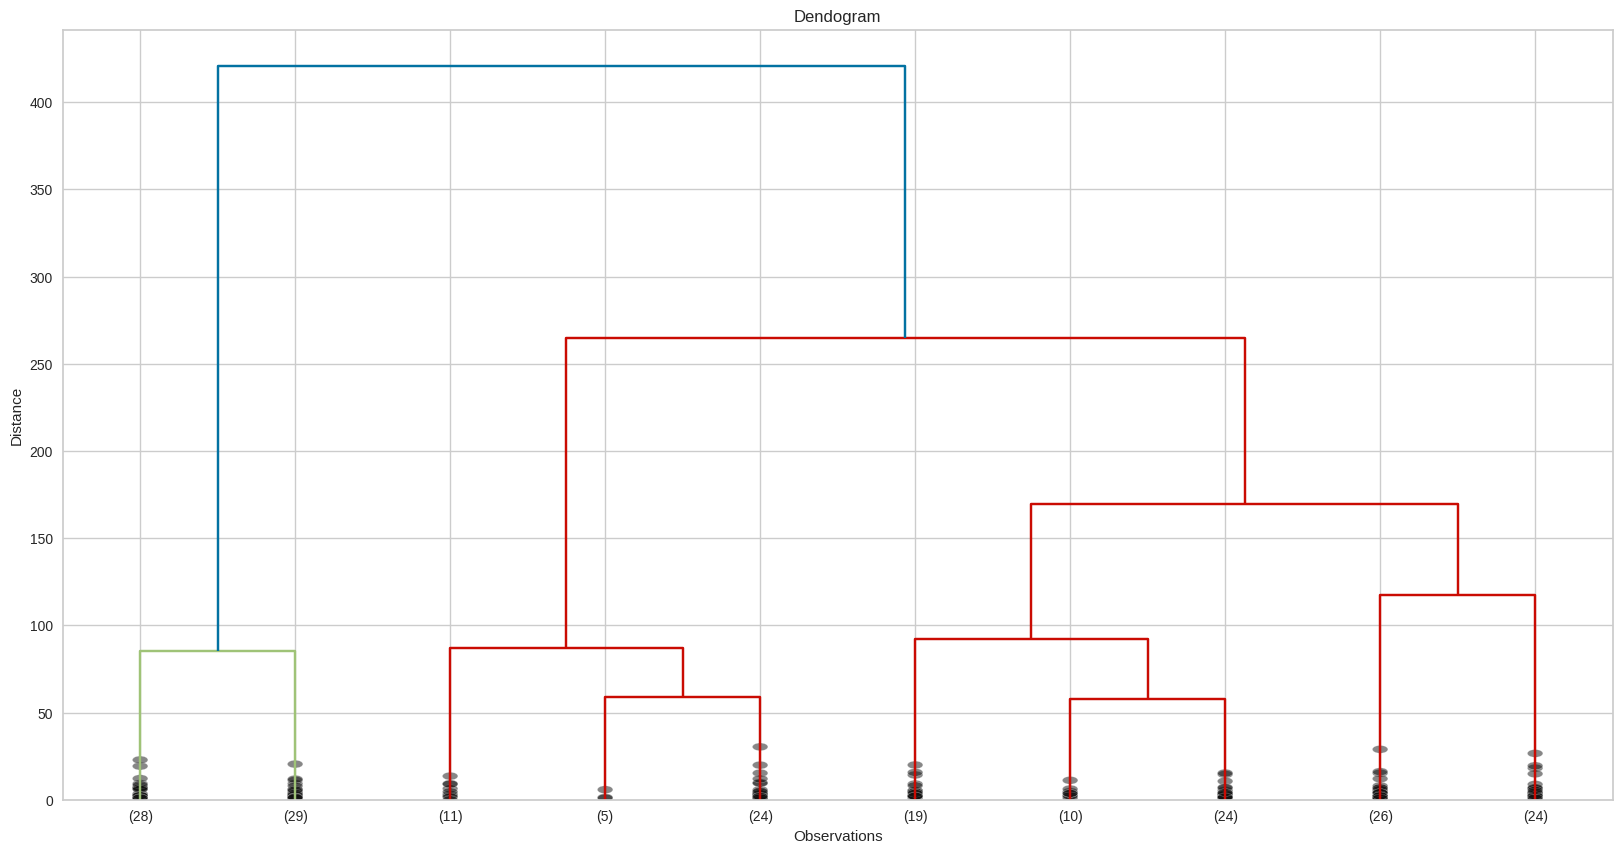

In [ ]:
@interact(method=["ward", "complete", "average", "single"])
def dendogramer(method):
    link = linkage(y=X1, method=method)
    plt.figure(figsize=(20, 10))
    plt.title("Dendogram")
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(link,
               truncate_mode="lastp",
               p=10,
               show_contracted=True,
               leaf_font_size=10)

In [ ]:
# Let's take some advice by looking at silhouette_scores:
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X1)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.4549465643222241
For n_clusters=3, the silhouette score is 0.4411791686353356
For n_clusters=4, the silhouette score is 0.4602496389565028
For n_clusters=5, the silhouette score is 0.40374071753059787
For n_clusters=6, the silhouette score is 0.4125958704145705
For n_clusters=7, the silhouette score is 0.4158977524079244
For n_clusters=8, the silhouette score is 0.3883688959732531
For n_clusters=9, the silhouette score is 0.3948151533262091
For n_clusters=10, the silhouette score is 0.3876666104778445


## We have determend that we will use 3 clusters using ward method.

### Clustering based on Annual Income and Spending Score- x2

interactive(children=(Dropdown(description='method', options=('ward', 'complete', 'average', 'single'), value=…

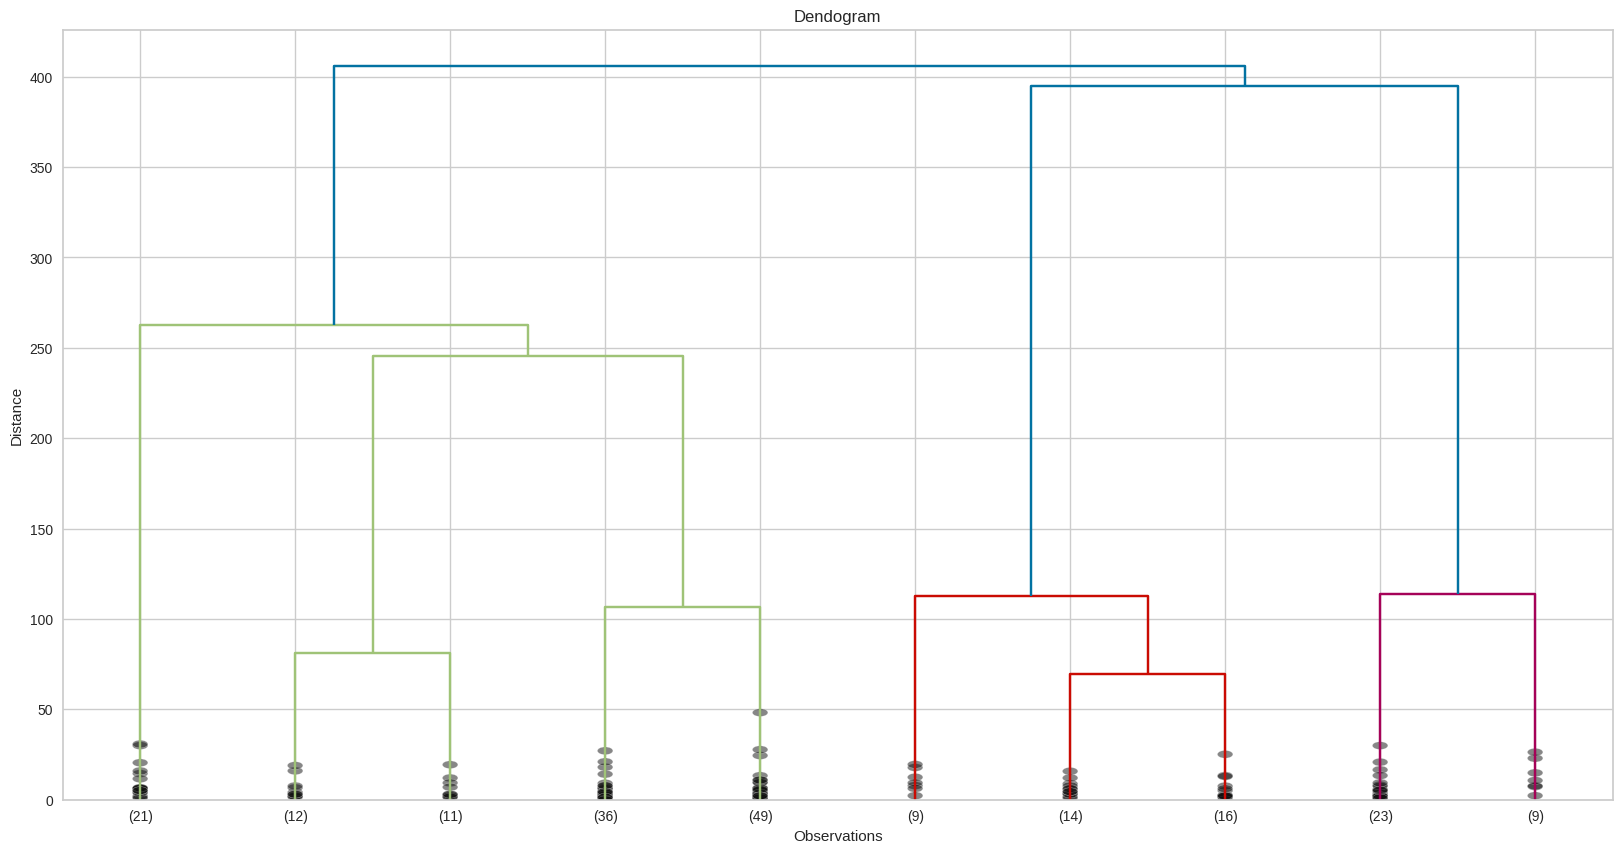

In [ ]:
@interact(method=["ward", "complete", "average", "single"])
def dendogramer(method):
    link = linkage(y=X2, method=method)
    plt.figure(figsize=(20, 10))
    plt.title("Dendogram")
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(link,
               truncate_mode="lastp",
               p=10,
               show_contracted=True,
               leaf_font_size=10)

In [ ]:
# Let's take some advice by looking at silhouette_scores:
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X2)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.36706444723912895
For n_clusters=3, the silhouette score is 0.4618340266628975
For n_clusters=4, the silhouette score is 0.4916598193892782
For n_clusters=5, the silhouette score is 0.5529945955148897
For n_clusters=6, the silhouette score is 0.5380208285578872
For n_clusters=7, the silhouette score is 0.519904611908887
For n_clusters=8, the silhouette score is 0.4326286245782246
For n_clusters=9, the silhouette score is 0.43892545672004507
For n_clusters=10, the silhouette score is 0.4342656377895271


## We have determend that we will use 3 clusters using ward method.

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
Agg1 = AgglomerativeClustering(n_clusters=4,affinity="euclidean", linkage="ward")
y_agg = Agg1.fit_predict(X1)

In [ ]:
df_x1['cluster_Agg'] = y_agg
df_x1.head()

,Age,Spending Score (1-100),cluster_Agg
0,19,39,0
1,21,81,3
2,20,6,2
3,23,77,3
4,31,40,0


#### Annual Income and Spending Score- x2

In [ ]:
Agg2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward') #older sklearn
y_agg2 = Agg2.fit_predict(X2)

In [ ]:
df_x2['cluster_Agg'] = y_agg2
df_x2.head()

,Annual Income (k$),Spending Score (1-100),cluster_Agg
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

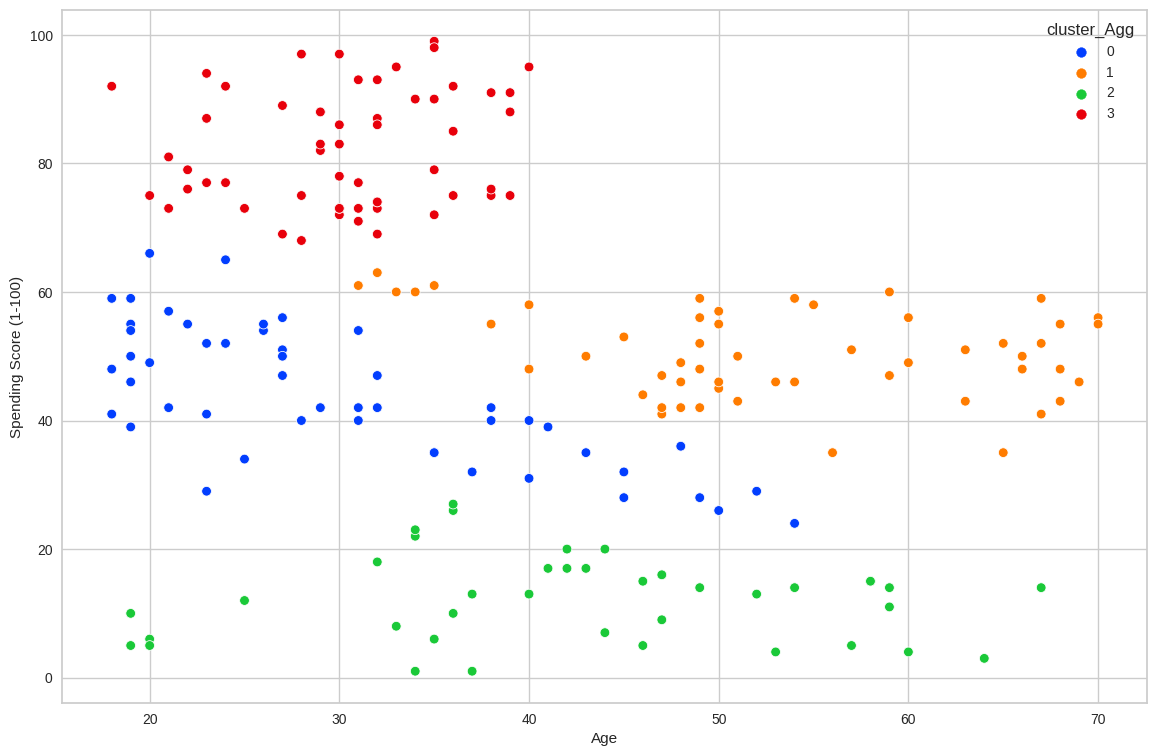

In [ ]:
plt.figure(figsize=(14, 9))
sns.scatterplot(x='Age',
                y='Spending Score (1-100)',
                hue='cluster_Agg',
                data=df_x1,
                palette="bright")


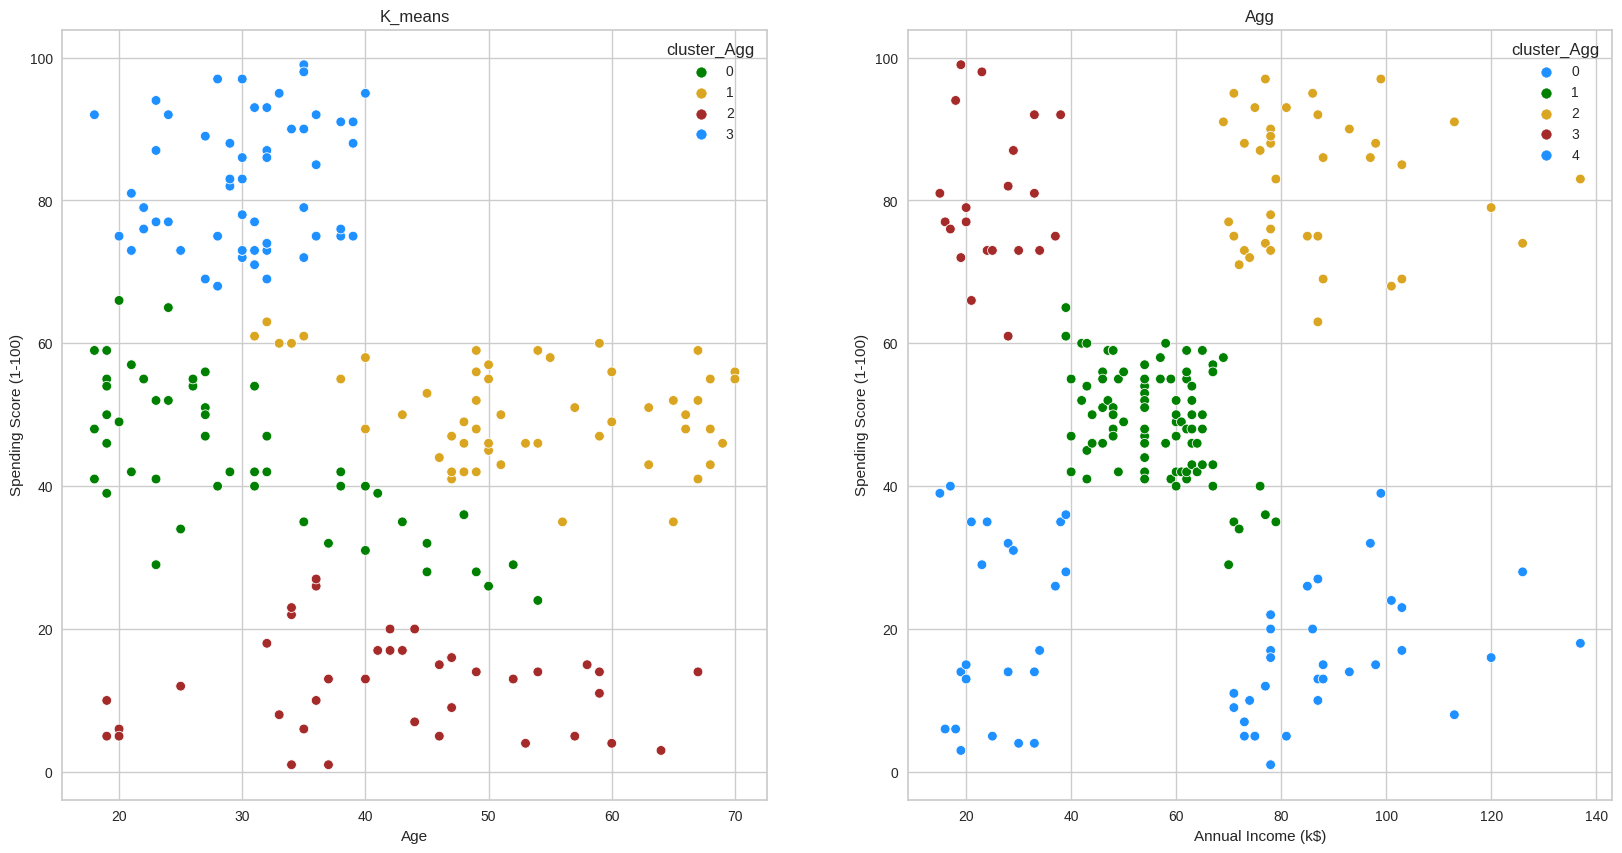

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
sns.scatterplot(x='Age',
                y='Spending Score (1-100)',
                hue='cluster_Agg',
                data=df_x1,
                palette=['green', 'goldenrod', 'brown', 'dodgerblue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='cluster_Agg',
                data=df_x2,
                palette=['dodgerblue', 'green', 'goldenrod', 'brown'])
plt.title("Agg");

#### Annual Income and Spending Score- x2

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

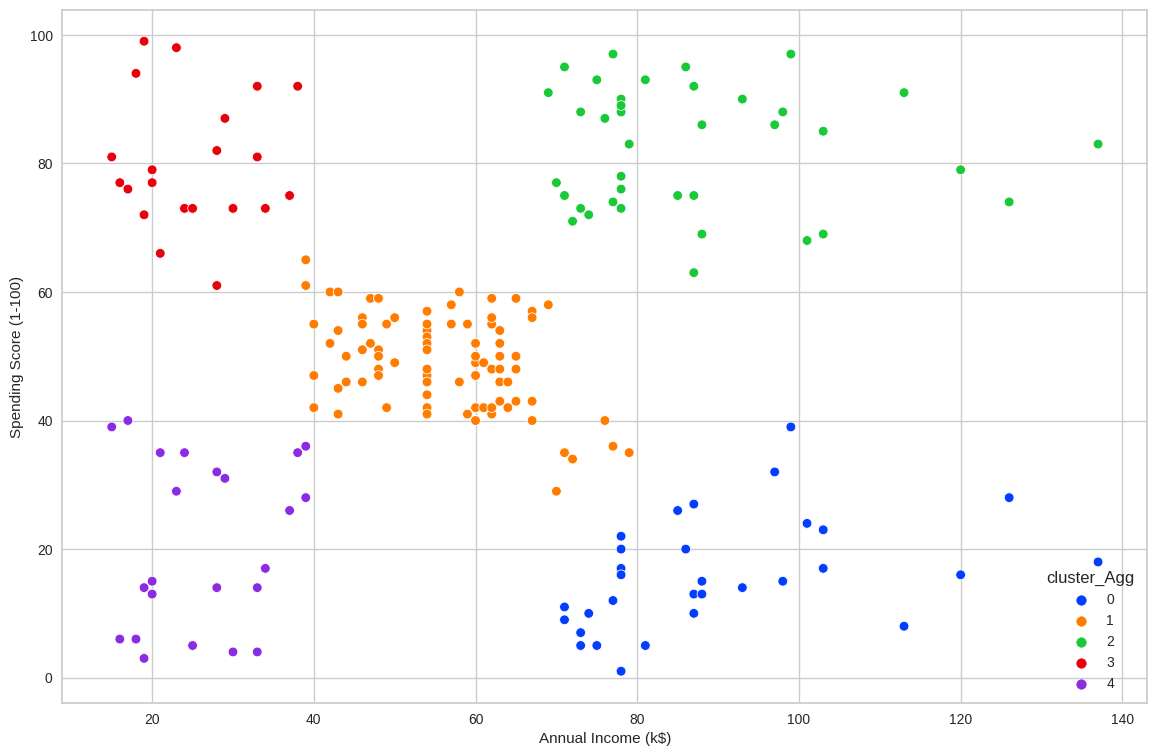

In [ ]:
plt.figure(figsize=(14,9))
sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='cluster_Agg',
                data=df_x2 ,
                palette="bright")

Text(0.5, 1.0, 'Agg')

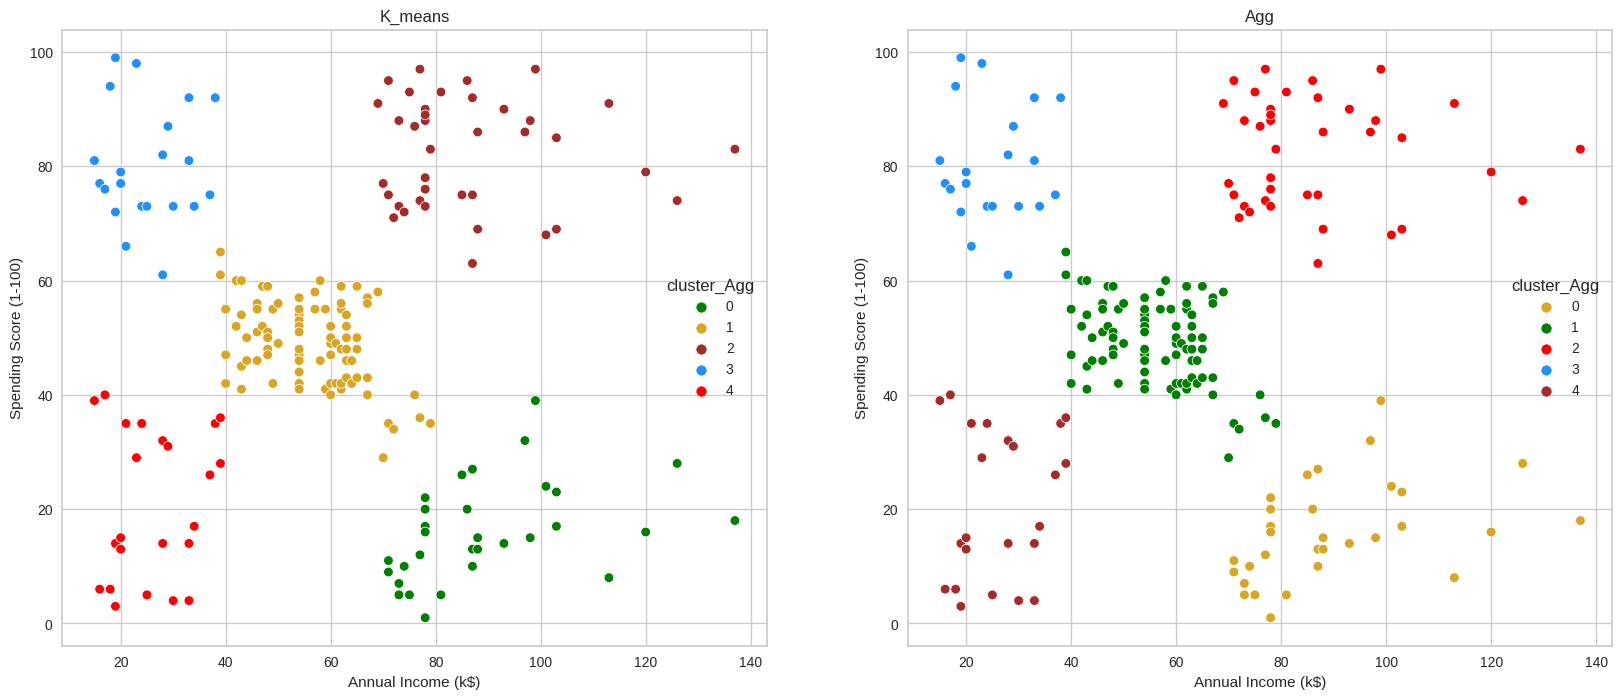

In [ ]:
plt.figure(figsize=(20, 8))

plt.subplot(121)
sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='cluster_Agg',
                data=df_x2,
                palette=['green', 'goldenrod', 'brown', 'dodgerblue', 'red'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='cluster_Agg',
                data=df_x2,
                palette=['goldenrod', 'green', 'red', 'dodgerblue', 'brown'])
plt.title("Agg")

#### Interpretation based on Age and Spending Score- x1

[Text(0, 0, '57'), Text(0, 0, '53'), Text(0, 0, '50'), Text(0, 0, '40')]

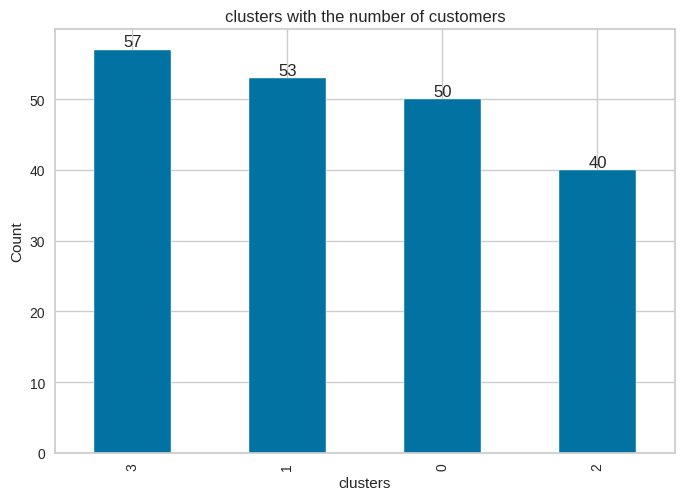

In [ ]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_x1.cluster_Agg.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])

In [ ]:
#adding  clusters resulting from Kmeans to our df (age-spending score)
df["cluster_Age_Spending_Score"] = df_x1.cluster_Agg
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusterx1_k,clusterx2_k,cluster_Age_Spending_Score
0,0,19,15,39,3,2,0
1,0,21,15,81,2,3,3
2,1,20,16,6,1,2,2
3,1,23,16,77,2,3,3
4,1,31,17,40,3,2,0


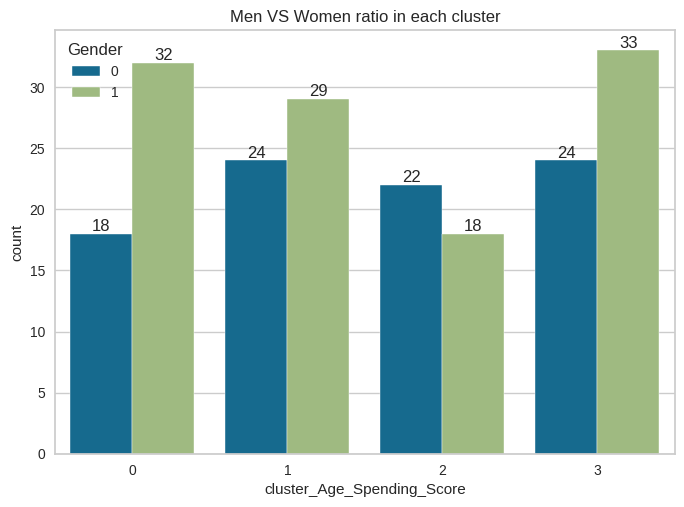

In [ ]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax = sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p) # We count clusters according to gender.

In [ ]:
#we group them according to the clusters formed.
df.groupby("cluster_Age_Spending_Score").mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusterx1_k,clusterx2_k
cluster_Age_Spending_Score,,,,,,
0,0.640000,30.520000,55.760000,43.620000,2.50000,0.620000
1,0.547170,53.169811,54.207547,50.452830,0.45283,0.188679
2,0.450000,42.650000,67.125000,12.275000,1.00000,1.325000
3,0.578947,30.175439,66.070175,82.350877,2.00000,3.666667


<Axes: xlabel='cluster_Age_Spending_Score', ylabel='Spending Score (1-100)'>

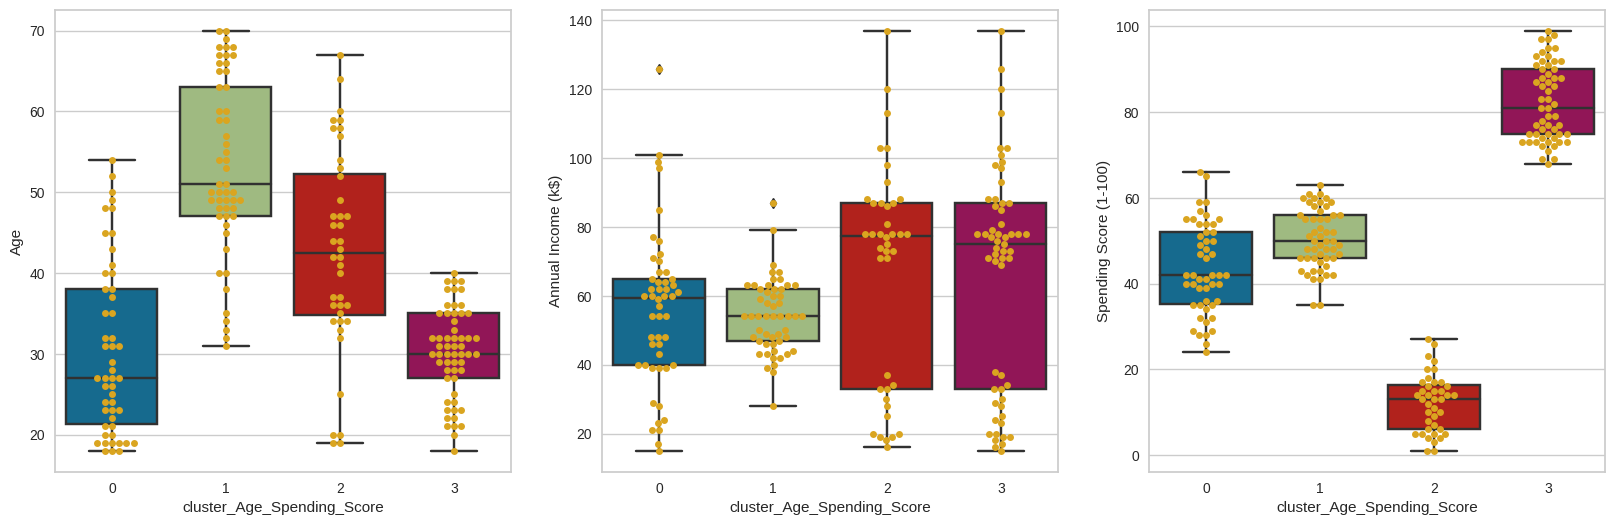

In [ ]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
sns.boxplot(y="Age", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Age",
              x="cluster_Age_Spending_Score",
              data=df,
              color="goldenrod")

plt.subplot(132)
sns.boxplot(y="Annual Income (k$)", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Annual Income (k$)",
              x="cluster_Age_Spending_Score",
              data=df,
              color="goldenrod")

plt.subplot(133)
sns.boxplot(y="Spending Score (1-100)", x="cluster_Age_Spending_Score", data=df)
sns.swarmplot(y="Spending Score (1-100)",
              x="cluster_Age_Spending_Score",
              data=df,
              color="goldenrod" )

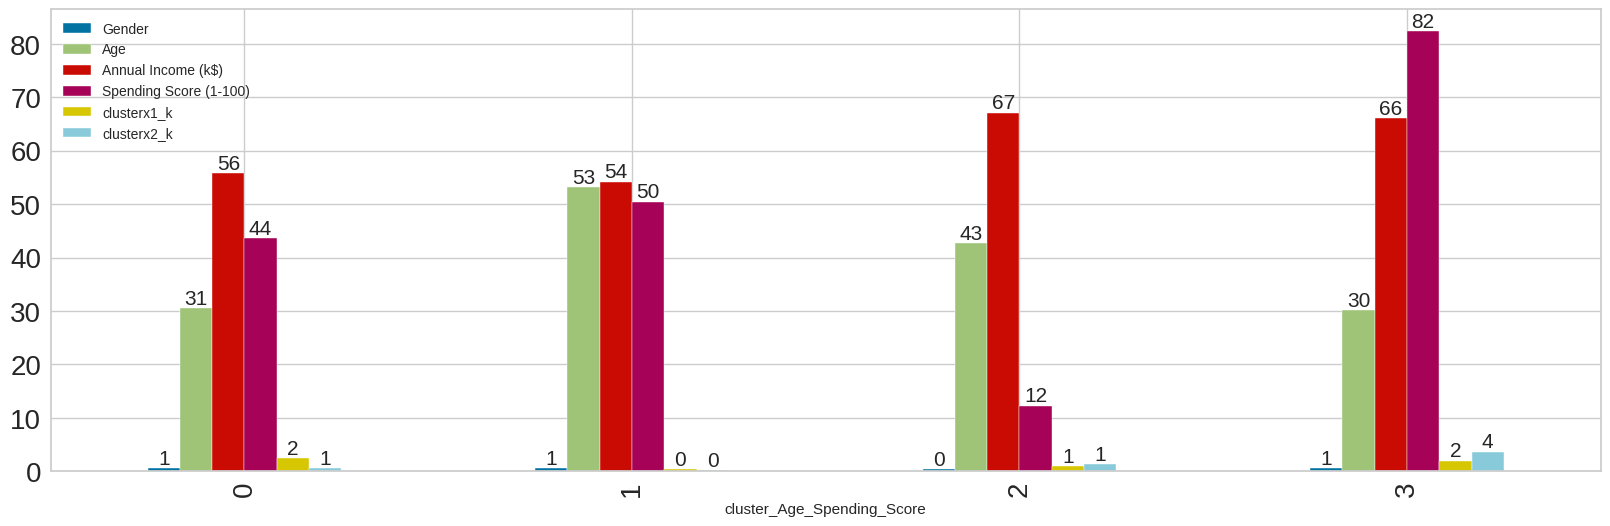

In [ ]:
ax = df.groupby("cluster_Age_Spending_Score").mean().plot(kind='bar',
                                                          figsize=(20, 6),
                                                          fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=15)

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

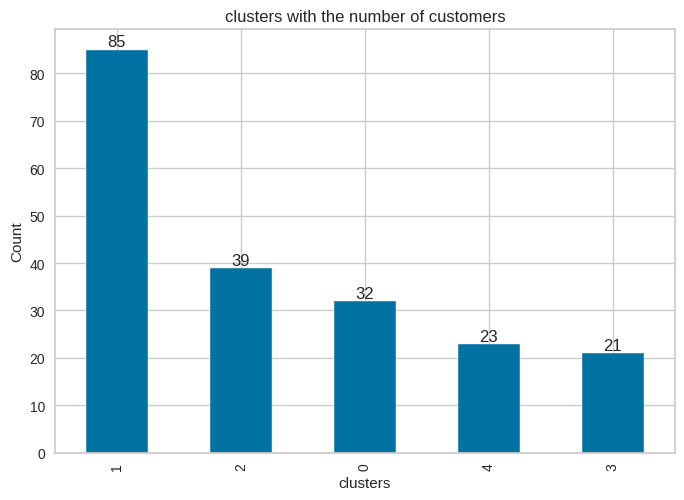

In [98]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_x2.cluster_Agg.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

In [ ]:
df.drop(columns="cluster_Age_Spending_Score", inplace=True)

According to Annual_Income and Spending_Score, we drop the cluster_Age_Spending_Score to get results according to the clusters we created with Kmeans.

In [ ]:
# Add cluster_Annual_Income_Spending_Score column.
df["cluster_Annual_Income_Spending_Score"] = df_x2.cluster_Agg

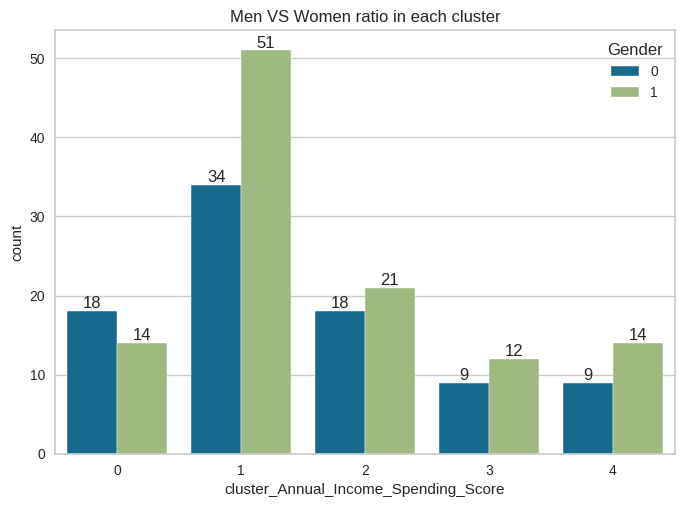

In [ ]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Annual_Income_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [ ]:
#group df by both Gender and cluster_Annual_Income_Spending_Score.
df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean()

Age  Annual Income (k$)  \
Gender cluster_Annual_Income_Spending_Score                                  
0      0                                     38.833333           86.388889   
       1                                     45.441176           55.852941   
       2                                     33.277778           87.111111   
       3                                     25.000000           25.777778   
       4                                     48.333333           24.666667   
1      0                                     43.785714           93.285714   
       1                                     40.509804           55.784314   
       2                                     32.190476           86.047619   
       3                                     25.583333           24.583333   
       4                                     43.214286           27.357143   

                                             Spending Score (1-100)  \
Gender cluster_Annual_Income_Spending_Score                           
0      0                                                  11.666667   
       1                                                  49.852941   
       2                                                  82.666667   
       3                                                  77.666667   
       4                                                  19.666667   
1      0                                                  20.642857   
       1                                                  48.647059   
       2                                                  81.666667   
       3                                                  81.833333   
       4                                                  21.714286   

                                             clusterx1_k  clusterx2_k  
Gender cluster_Annual_Income_Spending_Score                            
0      0                                        1.000000     1.000000  
       1                                        1.147059     0.029412  
       2                                        2.055556     4.000000  
       3                                        2.222222     3.000000  
       4                                        1.333333     2.000000  
1      0                                        1.142857     1.000000  
       1                                        1.529412     0.098039  
       2                                        2.000000     4.000000  
       3                                        2.000000     3.000000  
       4                                        1.214286     2.000000

<Axes: xlabel='cluster_Annual_Income_Spending_Score', ylabel='Spending Score (1-100)'>

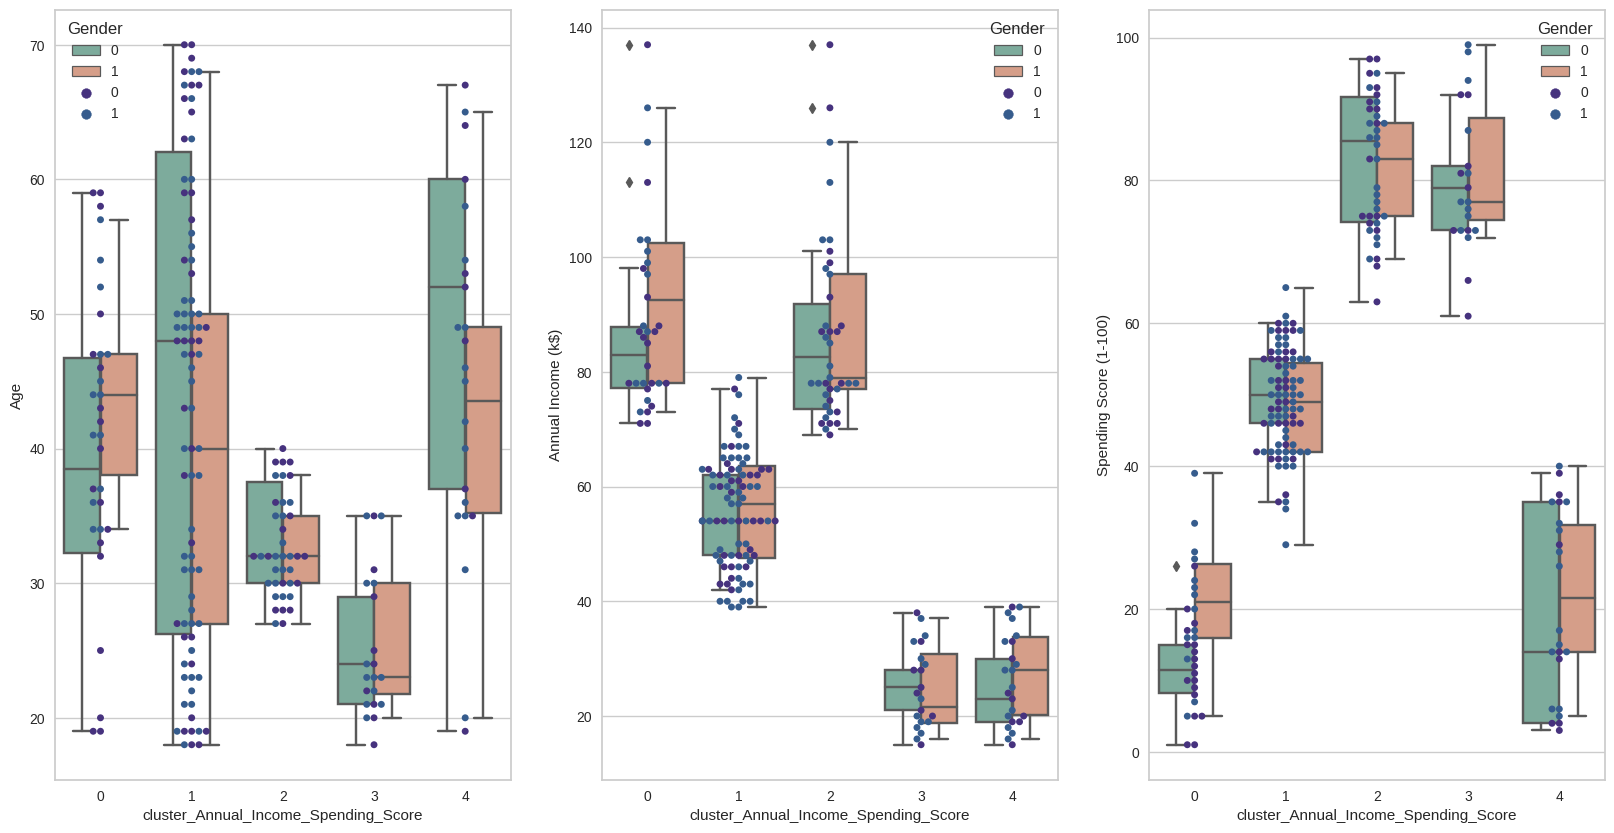

In [93]:
plt.figure(figsize = (20,10))

plt.subplot(131)
sns.boxplot(y="Age", x="cluster_Annual_Income_Spending_Score",
            hue= "Gender", data = df,palette="Set2",saturation=0.5)
sns.swarmplot(y = "Age", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("viridis"))

plt.subplot(132)
sns.boxplot(y="Annual Income (k$)", x="cluster_Annual_Income_Spending_Score",
            hue="Gender", data = df, palette="Set2",saturation=0.5)
sns.swarmplot(y = "Annual Income (k$)", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("viridis"))

plt.subplot(133)
sns.boxplot(y="Spending Score (1-100)", x="cluster_Annual_Income_Spending_Score",
            hue="Gender", data=df, palette="Set2",saturation=0.5);
sns.swarmplot(y = "Spending Score (1-100)", x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("viridis"))

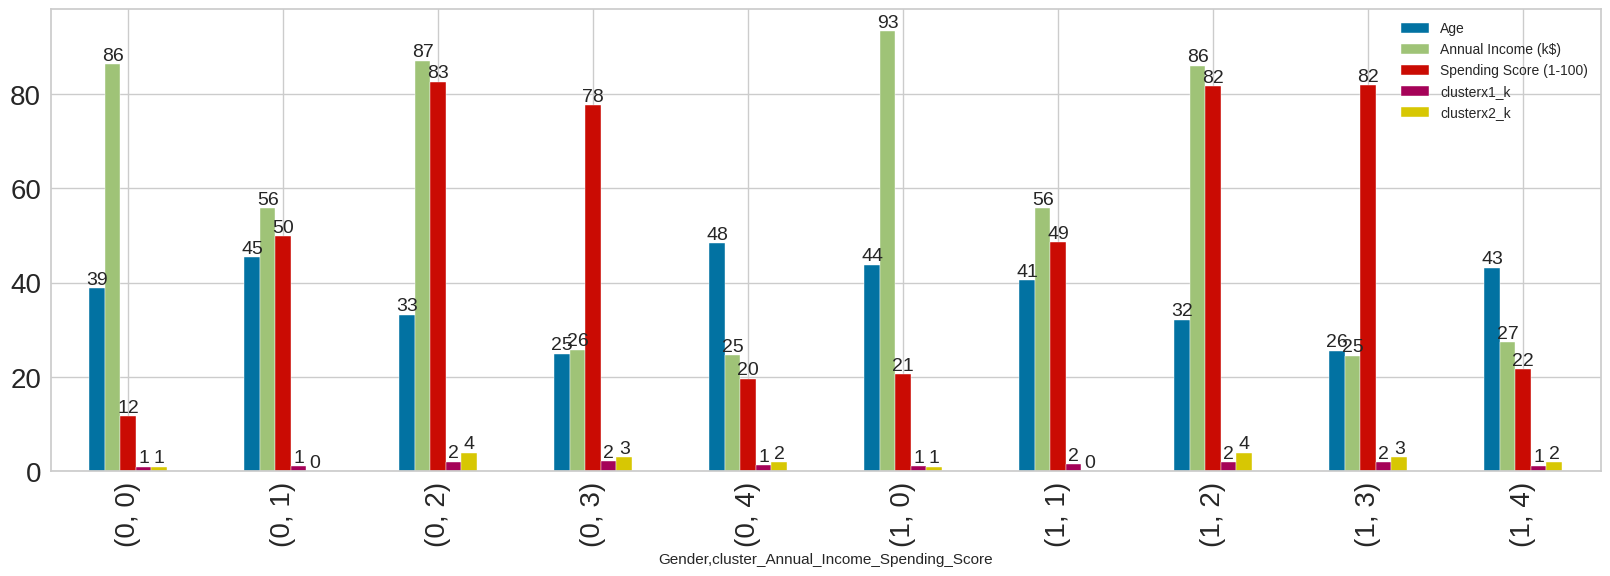

In [ ]:
ax = df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar",
                                                                                figsize=(20,6),
                                                                                fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

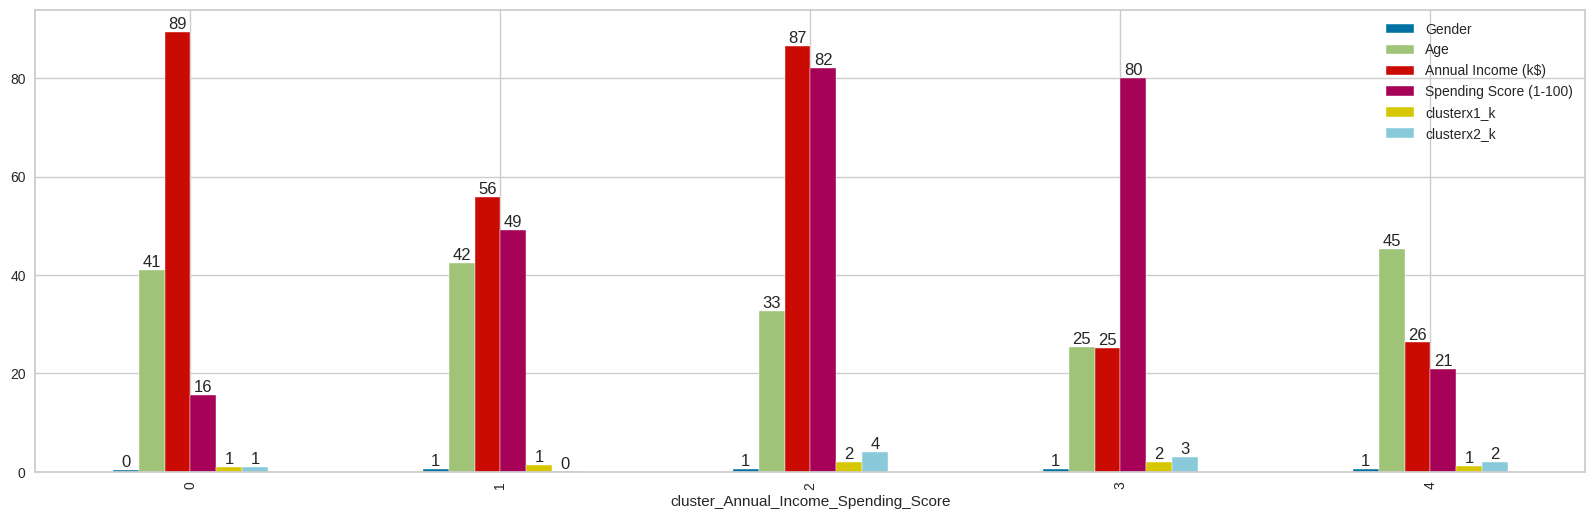

In [ ]:
ax = df.groupby("cluster_Annual_Income_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this
group.

 ## In this Notebook we used K-Means clustering to understand customer data. K-Means is a good clustering algorithm. Almost all the clusters have similar density.


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___